In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from tqdm import tqdm
%matplotlib inline
from torch.utils.data import Dataset, DataLoader
import torch
import torchvision

import torch.nn as nn
import torch.optim as optim
from torch.nn import functional as F
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


# Generate dataset

In [0]:
# y = np.random.randint(0,10,500)
# idx= []
# for i in range(10):
#     print(i,sum(y==i))
#     idx.append(y==i)

In [0]:
# x = np.zeros((500,2))
# x1 = np.zeros((500,2))

In [0]:
# x[idx[0],:] = np.random.multivariate_normal(mean = [2,7],cov=[[0.1,0],[0,0.1]],size=sum(idx[0]))
# x1[idx[0],:] = np.random.multivariate_normal(mean = [0,-10],cov=[[0.1,0],[0,0.1]],size=sum(idx[0]))

# x[idx[1],:] = np.random.multivariate_normal(mean = [-15,-7],cov=[[0.1,0],[0,0.1]],size=sum(idx[1]))
# x1[idx[1],:] = np.random.multivariate_normal(mean = [-5,15],cov=[[0.1,0],[0,0.1]],size=sum(idx[1]))

# x[idx[2],:] = np.random.multivariate_normal(mean = [4,-2],cov=[[0.1,0],[0,0.1]],size=sum(idx[2]))
# x1[idx[2],:] = np.random.multivariate_normal(mean = [-10,0],cov=[[0.1,0],[0,0.1]],size=sum(idx[2]))


# x[idx[3],:] = np.random.multivariate_normal(mean = [-5,0],cov=[[0.1,0],[0,0.1]],size=sum(idx[3]))
# x1[idx[3],:] = np.random.multivariate_normal(mean = [-20,10],cov=[[0.1,0],[0,0.1]],size=sum(idx[3]))

# x[idx[4],:] = np.random.multivariate_normal(mean =[-8,10] ,cov=[[0.1,0],[0,0.1]],size=sum(idx[4]))
# x1[idx[4],:] = np.random.multivariate_normal(mean = [10,20],cov=[[0.1,0],[0,0.1]],size=sum(idx[4]))


# x[idx[5],:] = np.random.multivariate_normal(mean = [-15,6],cov=[[0.1,0],[0,0.1]],size=sum(idx[5]))
# x1[idx[5],:] = np.random.multivariate_normal(mean = [0,2],cov=[[0.1,0],[0,0.1]],size=sum(idx[5]))

# x[idx[6],:] = np.random.multivariate_normal(mean = [2,-18],cov=[[0.1,0],[0,0.1]],size=sum(idx[6]))
# x1[idx[6],:] = np.random.multivariate_normal(mean = [7,7],cov=[[0.1,0],[0,0.1]],size=sum(idx[6]))

# x[idx[7],:] = np.random.multivariate_normal(mean = [10,-10],cov=[[0.1,0],[0,0.1]],size=sum(idx[7]))
# x1[idx[7],:] = np.random.multivariate_normal(mean = [-8,-11],cov=[[0.1,0],[0,0.1]],size=sum(idx[7]))

# x[idx[8],:] = np.random.multivariate_normal(mean = [-10,-15],cov=[[0.1,0],[0,0.1]],size=sum(idx[8]))
# x1[idx[8],:] = np.random.multivariate_normal(mean = [10,-2],cov=[[0.1,0],[0,0.1]],size=sum(idx[8]))

# x[idx[9],:] = np.random.multivariate_normal(mean = [15,8],cov=[[0.1,0],[0,0.1]],size=sum(idx[9]))
# x1[idx[9],:] = np.random.multivariate_normal(mean = [2,20],cov=[[0.1,0],[0,0.1]],size=sum(idx[9]))

In [0]:
# x,y = np.concatenate((x,x1),axis=0),np.concatenate((y,y),axis=0)
# x.shape,y.shape

# save data

In [0]:
# np.save("toy_gaus_mixture_input.npy",x)
# np.save("toy_gaus_mixture_target.npy",y)


# load data

In [0]:
x = np.load("data/toy_gaus_mixture_input.npy")
y = np.load("data/toy_gaus_mixture_target.npy")
print(x.shape,y.shape)

(1000, 2) (1000,)


In [0]:
# y = np.random.randint(0,10,1000)
idx= []
for i in range(10):
    #print(i,sum(y==i))
    idx.append(y==i)

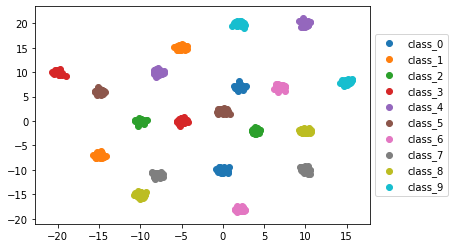

In [0]:
for i in range(10):
    plt.scatter(x[idx[i],0],x[idx[i],1],label="class_"+str(i))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

In [0]:
foreground_classes = {'class_0','class_1', 'class_2'}

background_classes = {'class_3','class_4', 'class_5', 'class_6','class_7', 'class_8', 'class_9'}

In [0]:
fg_class  = np.random.randint(0,3)
fg_idx = np.random.randint(0,4)

a = []
for i in range(4):
    if i == fg_idx:
        b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
        a.append(x[b])
        print("foreground "+str(fg_class)+" present at " + str(fg_idx))
    else:
        bg_class = np.random.randint(3,10)
        b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
        a.append(x[b])
        print("background "+str(bg_class)+" present at " + str(i))
a = np.concatenate(a,axis=0)
print(a.shape)

print(fg_class , fg_idx)

background 6 present at 0
foreground 0 present at 1
background 8 present at 2
background 4 present at 3
(4, 2)
0 1


In [0]:
a.shape

(4, 2)

In [0]:
np.reshape(a,(8,1))

array([[  1.94428802],
       [-17.82572067],
       [ -0.6794538 ],
       [-10.09967218],
       [  9.74437902],
       [ -2.08454348],
       [ -7.83599775],
       [  9.99995243]])

In [0]:
a=np.reshape(a,(2,4))

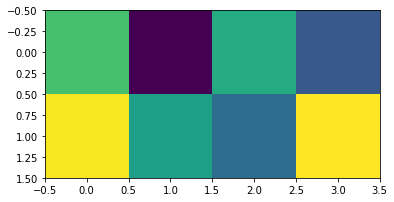

In [0]:
plt.imshow(a)

In [0]:
desired_num = 3000
mosaic_list =[]
mosaic_label = []
fore_idx=[]
for j in range(desired_num):
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,4)
    a = []
    for i in range(4):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list.append(np.reshape(a,(8,1)))
    mosaic_label.append(fg_class)
    fore_idx.append(fg_idx)

In [0]:
mosaic_list = np.concatenate(mosaic_list,axis=1).T
print(mosaic_list)

[[ 14.83493309   8.24075365  -4.76766098 ...   9.3807373    4.16760438
   -1.33506917]
 [ -7.88181039   9.73695514  -8.15058965 ...   7.12863747   2.13391947
  -17.93294812]
 [  0.42685527   1.79092149  -0.25809567 ...   9.75054752  10.16079796
  -10.41931785]
 ...
 [ -0.13722834 -10.3764885   -8.17514432 ...  20.06726225  15.45728477
    7.9829145 ]
 [  7.49382161   6.10637306  -5.35974994 ... -15.20912933 -10.16942602
    0.526766  ]
 [  2.38317381   7.13297326 -19.80486516 ... -17.91415327 -15.10629614
    6.38803039]]


In [0]:
print(np.shape(mosaic_label))
print(np.shape(fore_idx))

(3000,)
(3000,)


# Display data function

In [0]:
class MosaicDataset(Dataset):
  """MosaicDataset dataset."""

  def __init__(self, mosaic_list, mosaic_label, fore_idx):
    """
      Args:
        csv_file (string): Path to the csv file with annotations.
        root_dir (string): Directory with all the images.
        transform (callable, optional): Optional transform to be applied
            on a sample.
    """
    self.mosaic = mosaic_list
    self.label = mosaic_label
    self.fore_idx = fore_idx

  def __len__(self):
    return len(self.label)

  def __getitem__(self, idx):
    return self.mosaic[idx] , self.label[idx], self.fore_idx[idx]

batch = 250
msd = MosaicDataset(mosaic_list, mosaic_label , fore_idx)
train_loader = DataLoader( msd,batch_size= batch ,shuffle=False)

In [0]:
class Wherenet(nn.Module):
    def __init__(self):
        super(Wherenet,self).__init__()
        self.linear1 = nn.Linear(2,16)
        self.linear2 = nn.Linear(16,32)
        self.linear3 = nn.Linear(32,1)
    def forward(self,z):
        x = torch.zeros([batch,4],dtype=torch.float64)
        y = torch.zeros([batch,2], dtype=torch.float64)
        #x,y = x.to("cuda"),y.to("cuda")
        for i in range(4):
            x[:,i] = self.helper(z[:,2*i:2*i+2])[:,0]
            #print(k[:,0].shape,x[:,i].shape)
        x = F.softmax(x,dim=1)   # alphas
        x1 = x[:,0]
        for i in range(4):
            x1 = x[:,i]          
            #print()
            y = y+torch.mul(x1[:,None],z[:,2*i:2*i+2])
        return y , x 

    
    def helper(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

    

In [0]:
trainiter = iter(train_loader)
input1,labels1,index1 = trainiter.next()



In [0]:
class Whatnet(nn.Module):
    def __init__(self):
        super(Whatnet,self).__init__()
        self.linear1 = nn.Linear(2,8)
        self.linear2 = nn.Linear(8,16)
        self.linear3 = nn.Linear(16,3)
    def forward(self,x):
        x = F.relu(self.linear1(x))
        x = F.relu(self.linear2(x))
        x = self.linear3(x)
        return x

In [0]:
test_data_required = 1000
mosaic_list_test =[]
mosaic_label_test = []
fore_idx_test=[]
for j in range(test_data_required):
    fg_class  = np.random.randint(0,3)
    fg_idx = np.random.randint(0,4)
    a = []
    for i in range(4):
        if i == fg_idx:
            b = np.random.choice(np.where(idx[fg_class]==True)[0],size=1)
            a.append(x[b])
#             print("foreground "+str(fg_class)+" present at " + str(fg_idx))
        else:
            bg_class = np.random.randint(3,10)
            b = np.random.choice(np.where(idx[bg_class]==True)[0],size=1)
            a.append(x[b])
#             print("background "+str(bg_class)+" present at " + str(i))
    a = np.concatenate(a,axis=0)
    mosaic_list_test.append(np.reshape(a,(8,1)))
    mosaic_label_test.append(fg_class)
    fore_idx_test.append(fg_idx)

In [0]:
mosaic_list_test = np.concatenate(mosaic_list_test,axis=1).T
print(mosaic_list_test.shape)

(1000, 8)


In [0]:
test_data = MosaicDataset(mosaic_list_test,mosaic_label_test,fore_idx_test)
test_loader = DataLoader( test_data,batch_size= batch ,shuffle=False)

In [0]:
where = Wherenet().double()
where = where
out_where,alphas = where(input1)
out_where.shape,alphas.shape

(torch.Size([250, 2]), torch.Size([250, 4]))

In [0]:
what = Whatnet().double()
# what(out_where)

In [0]:
def disp_plot(data,avg_data,i,true_label,pred_label,alpha,true_idx):
    plt.figure(figsize=(6,6))
    data = data.numpy()
    alpha = alpha.detach().numpy()
    avg_data = avg_data.detach().numpy()
    x = [data[0], data[2], data[4], data[6],data[0] ]
    y = [data[1], data[3], data[5], data[7],data[1] ]
    
    
    #print(inputs[0])
    plt.plot(x,y,"--", label = "true_label_"+str(true_label)+"_pred_label_"+str(pred_label))
    plt.plot(data[0],data[1],"o",label=str(alpha[0]))
    plt.plot(data[2],data[3],"o",label=str(alpha[1]))
    plt.plot(data[4],data[5],"o",label=str(alpha[2]))
    plt.plot(data[6],data[7],"o",label=str(alpha[3]))
    plt.plot(avg_data[0], avg_data[1],marker="x", markersize=16 ,label = "true_idx_"+str(true_idx))
#     plt.text(data[0],data[1],str(float(alpha[0]))+"idx_0")
#     plt.text(data[2],data[3],str(alpha[1])+"idx_1")
#     plt.text(data[4],data[5],str(alpha[2])+"idx_2")
#     plt.text(data[6],data[7],str(alpha[3])+"idx_3")
    plt.text(data[0]+0.2,data[1]+0.2,"0")
    plt.text(data[2]+0.2,data[3]+0.2,"1")
    plt.text(data[4]+0.2,data[5]+0.2,"2")
    plt.text(data[6]+0.2,data[7]+0.2,"3")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

/home/dell/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


Finished Training


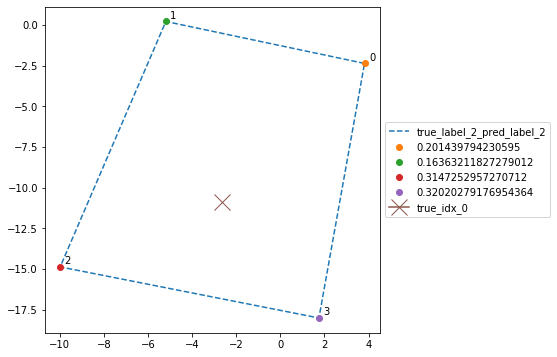

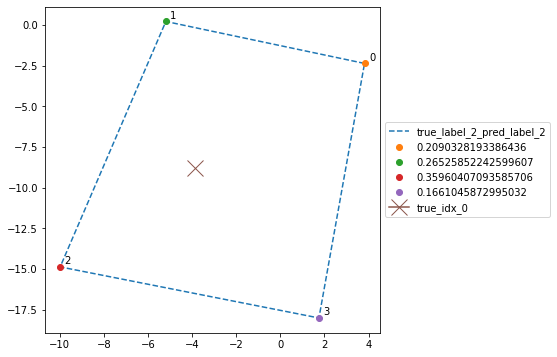

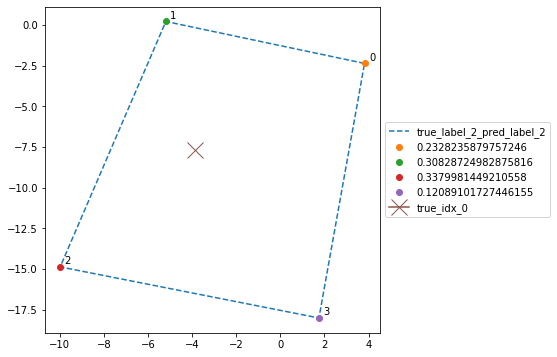

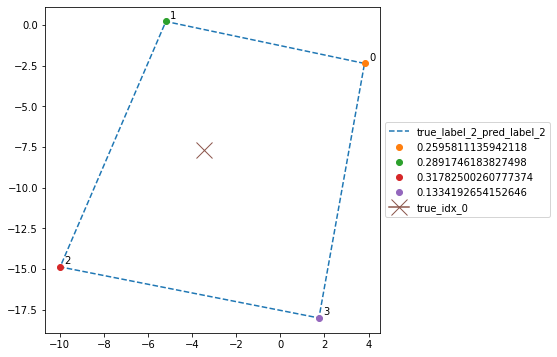

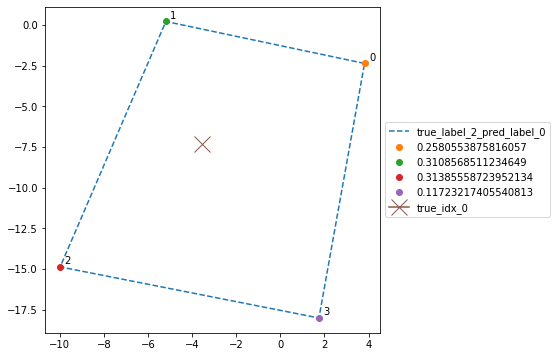

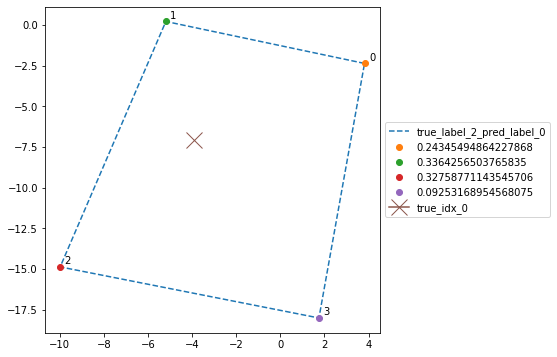

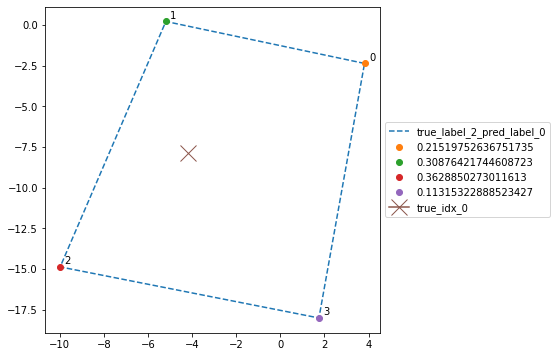

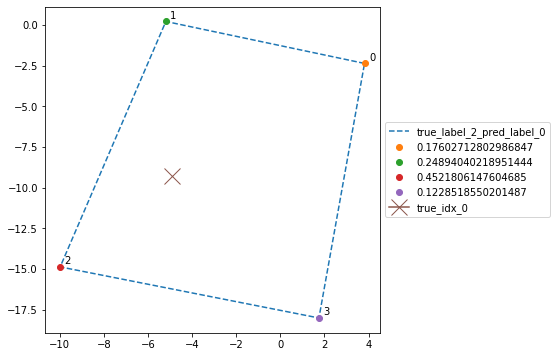

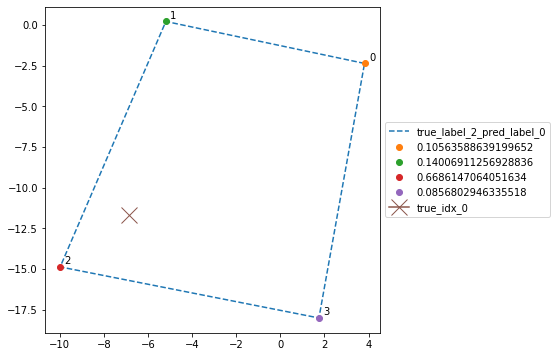

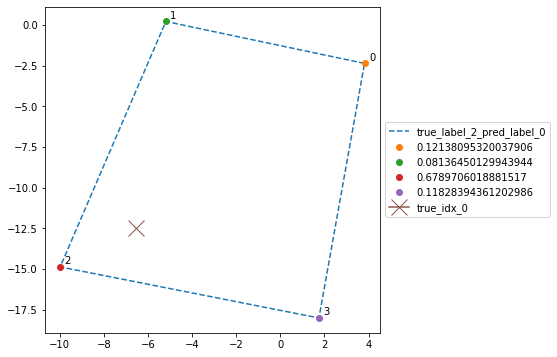

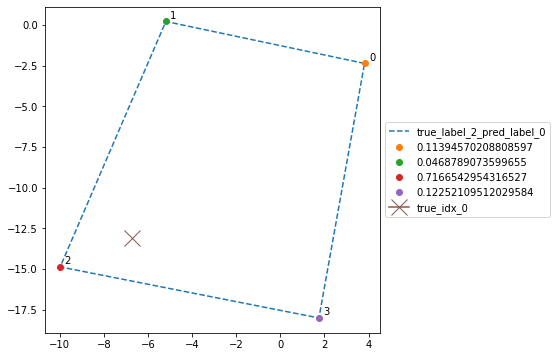

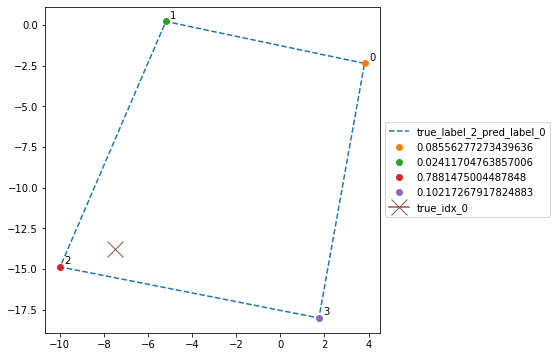

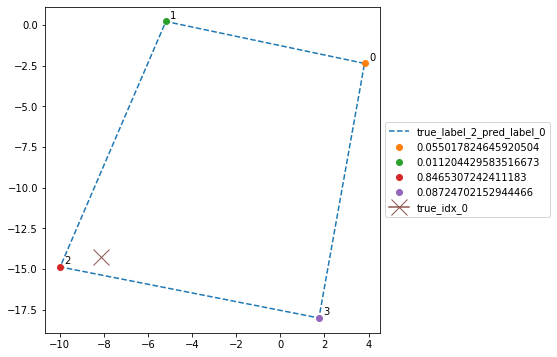

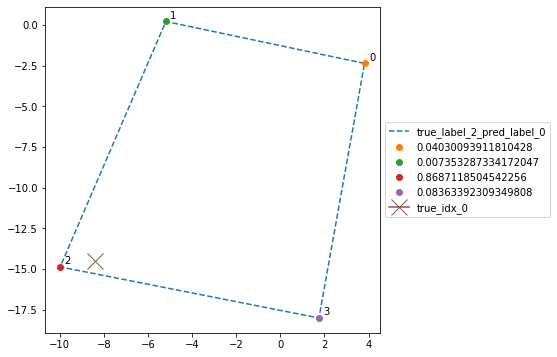

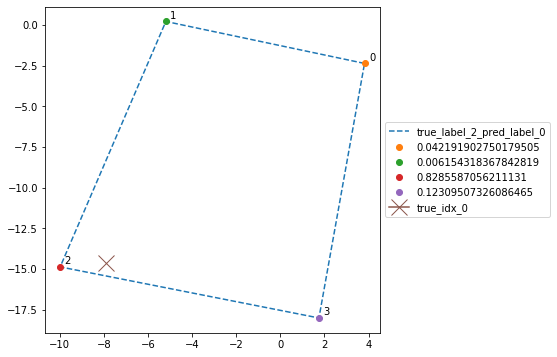

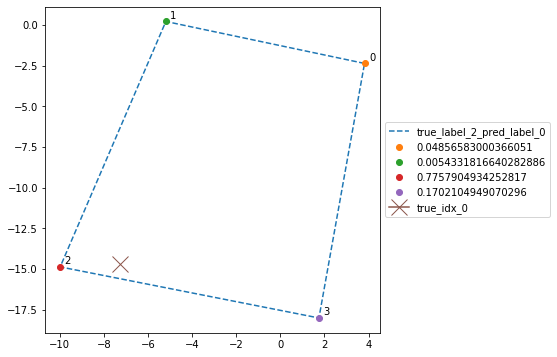

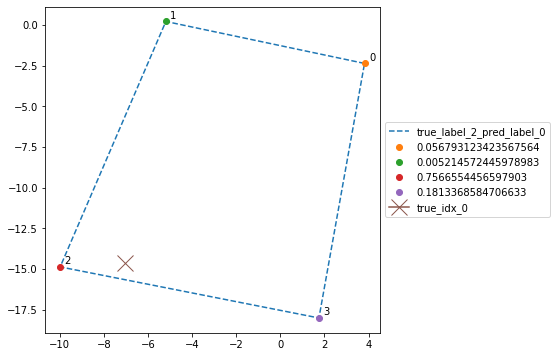

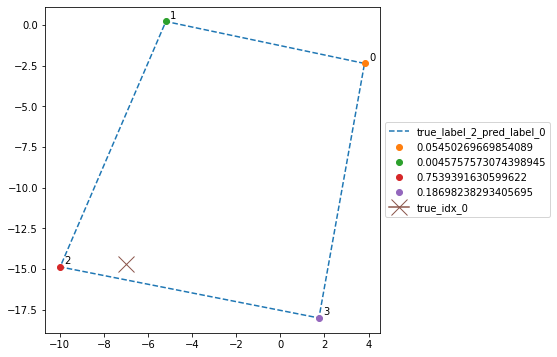

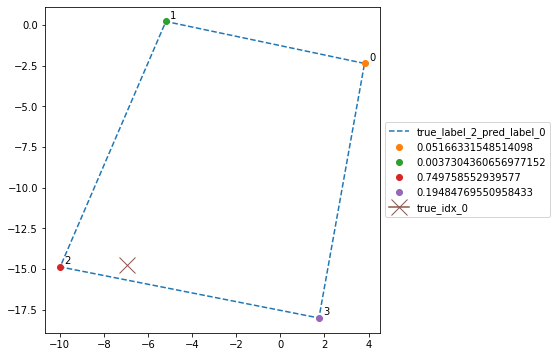

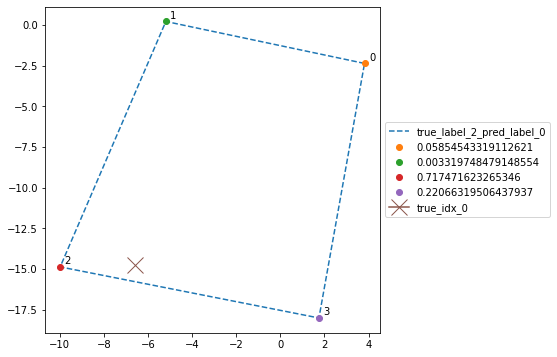

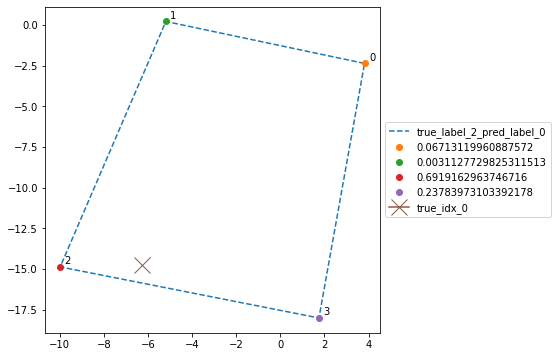

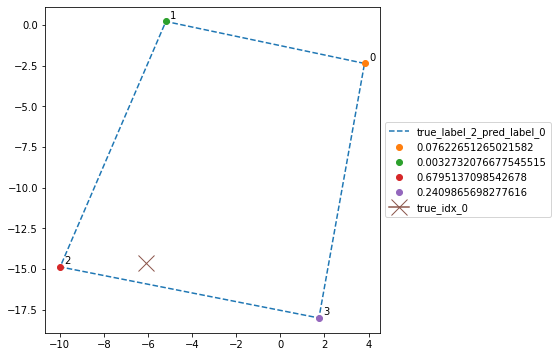

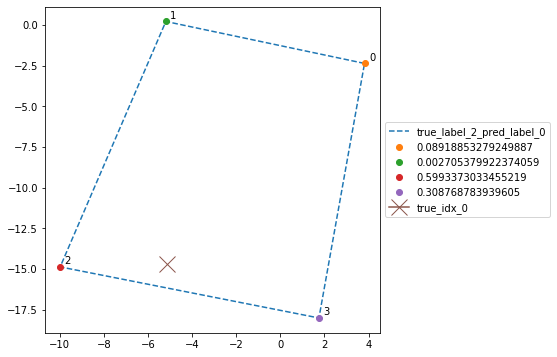

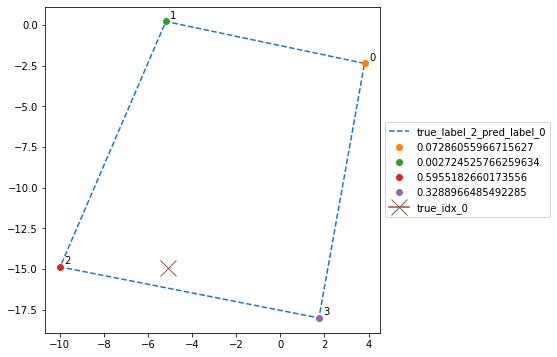

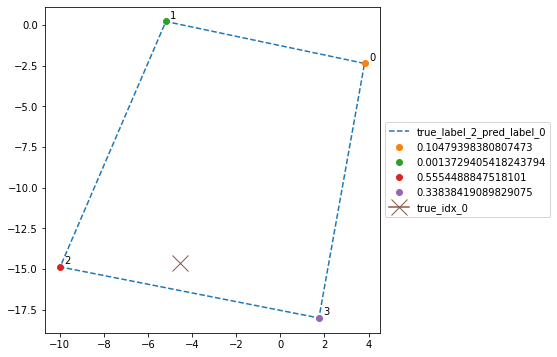

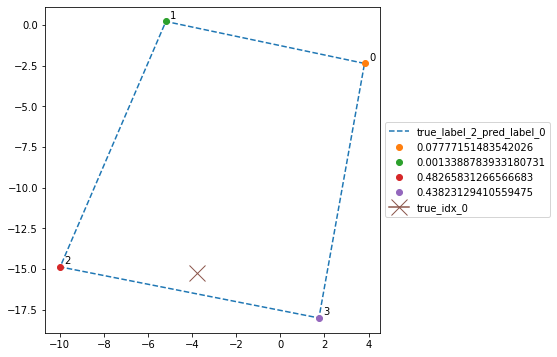

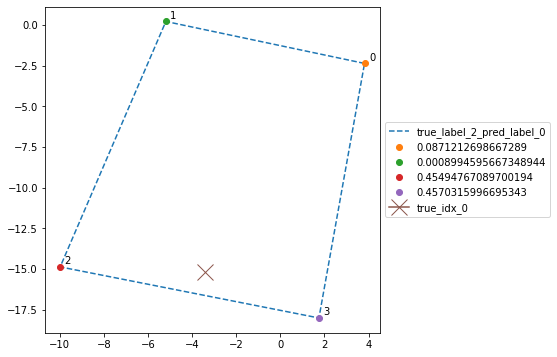

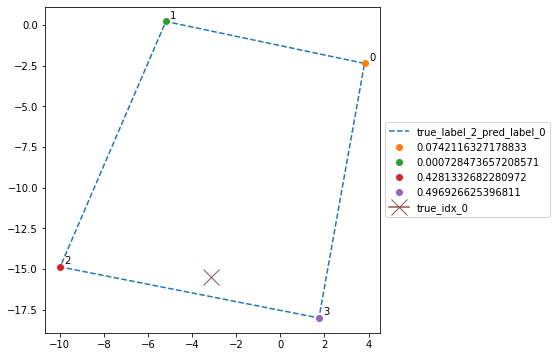

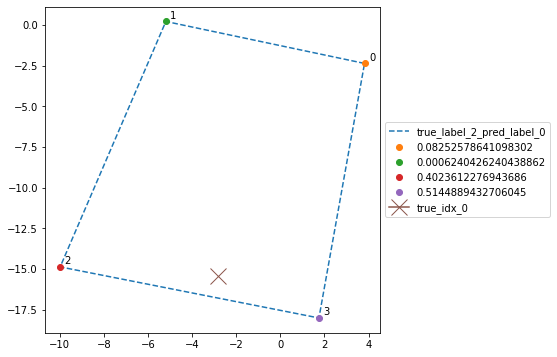

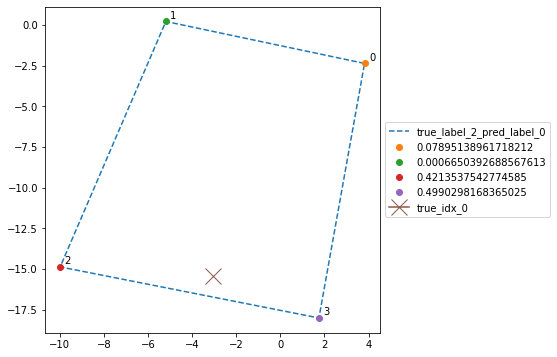

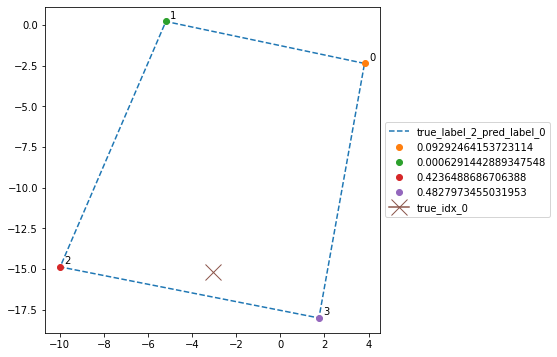

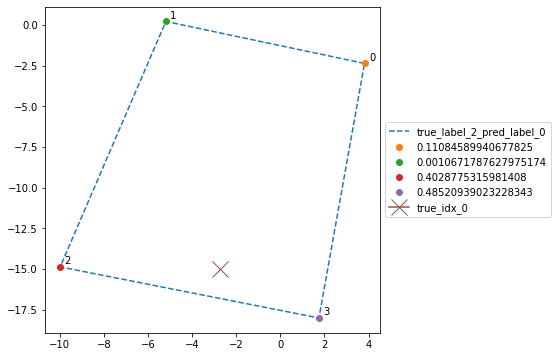

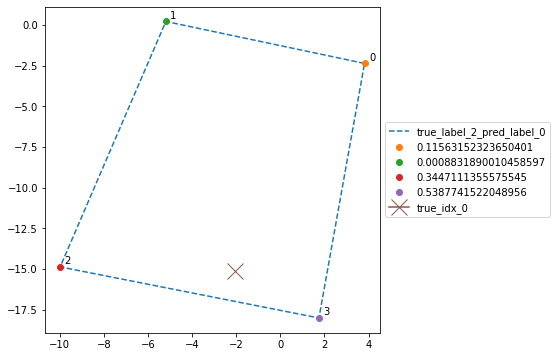

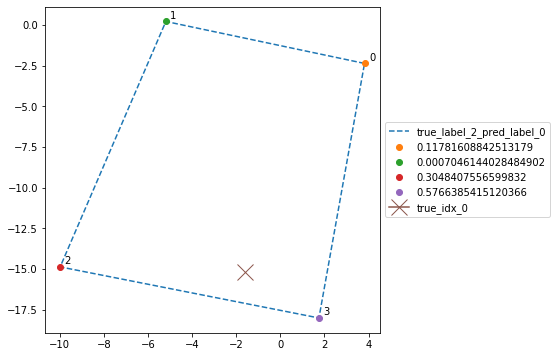

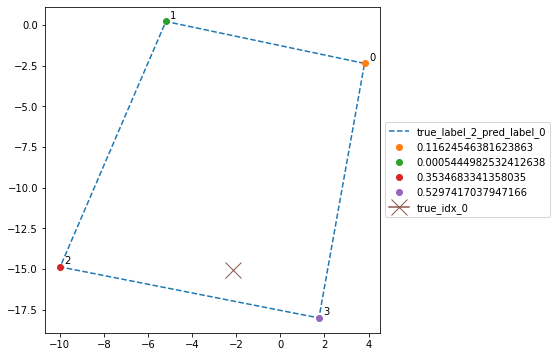

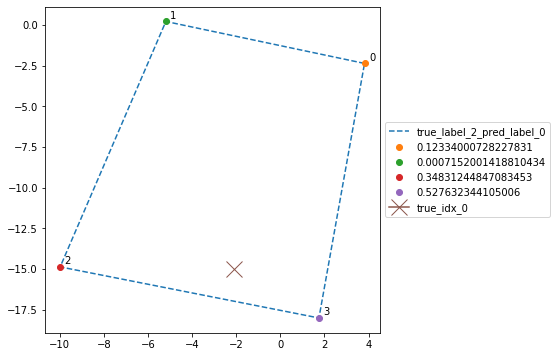

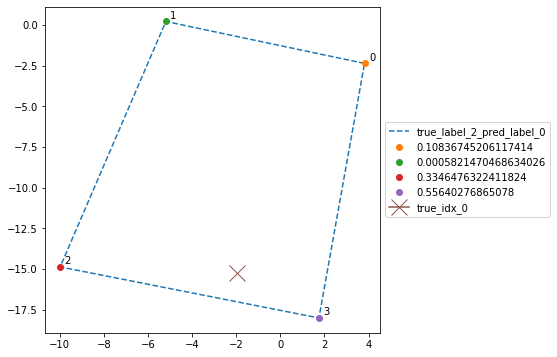

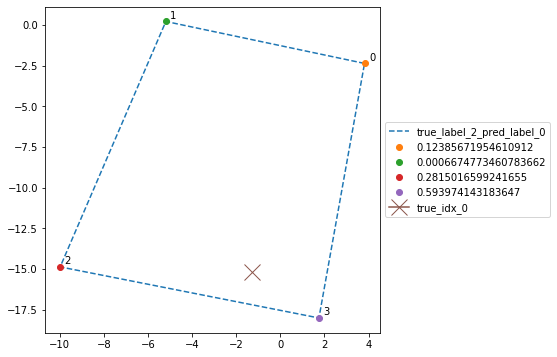

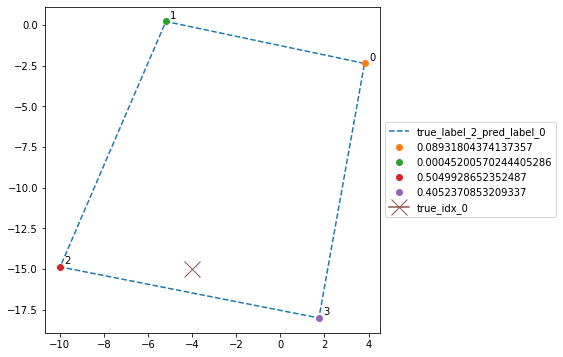

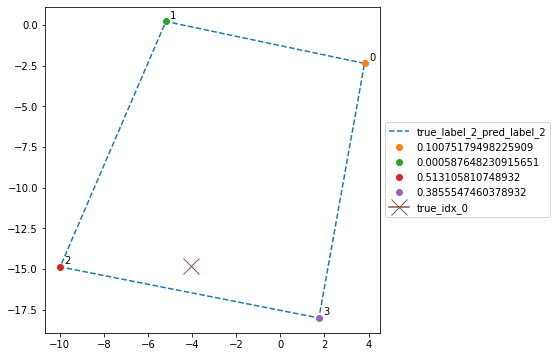

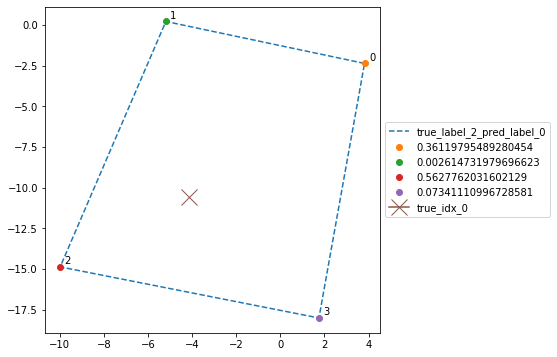

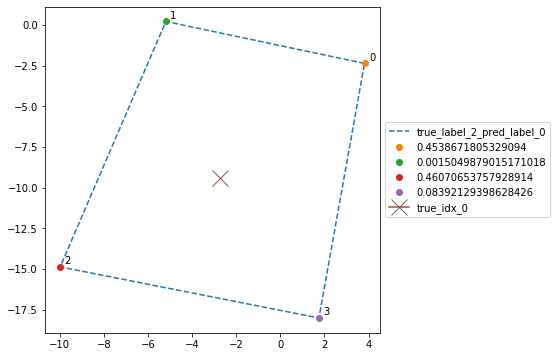

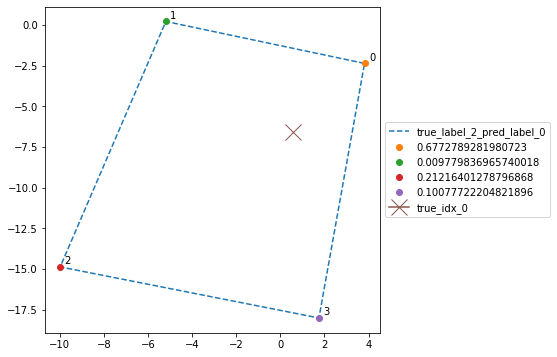

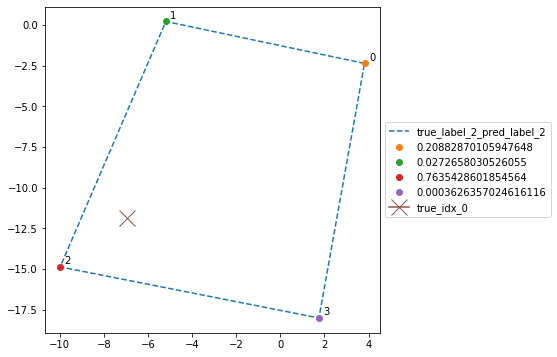

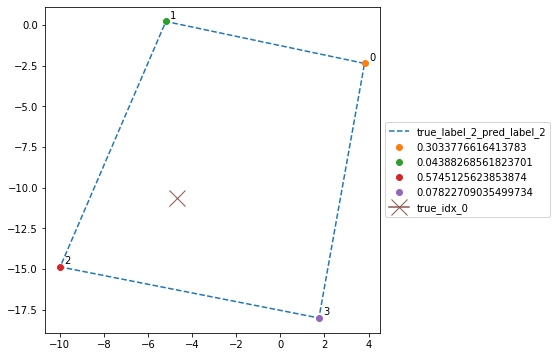

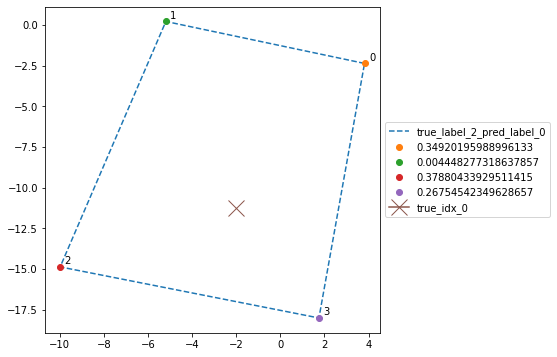

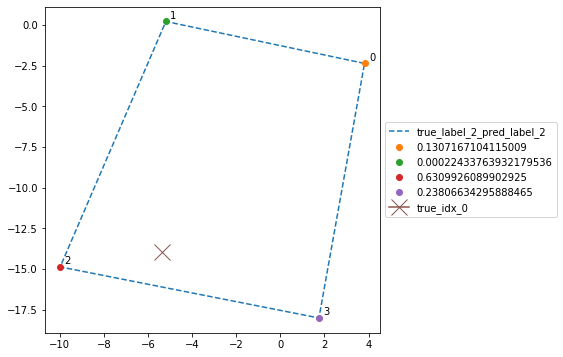

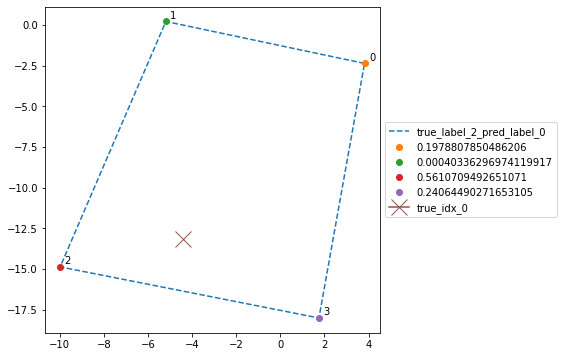

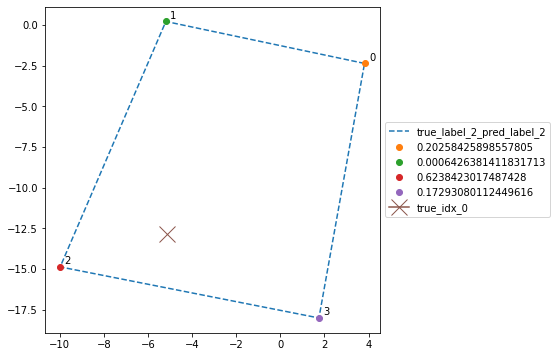

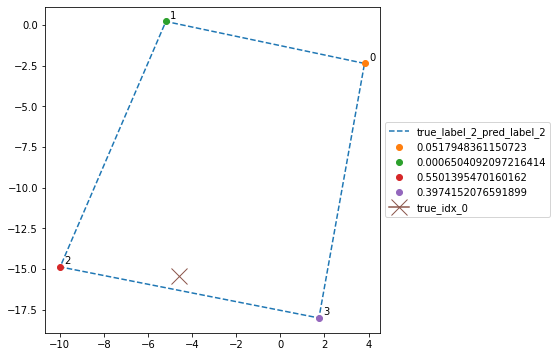

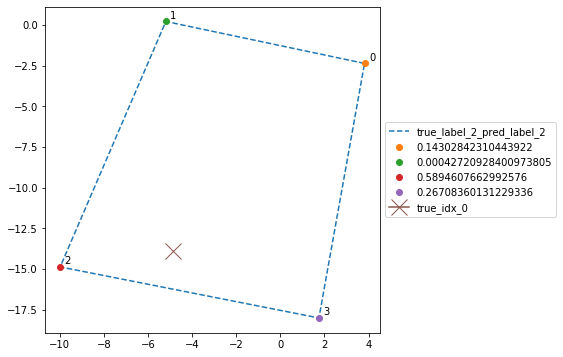

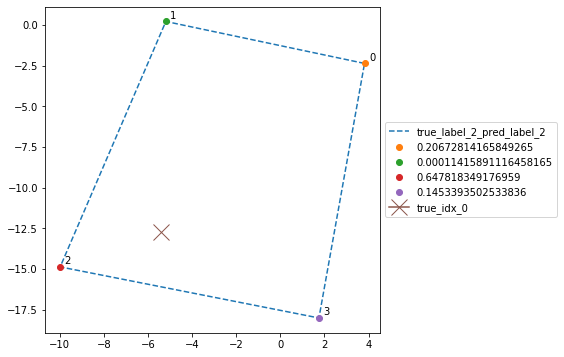

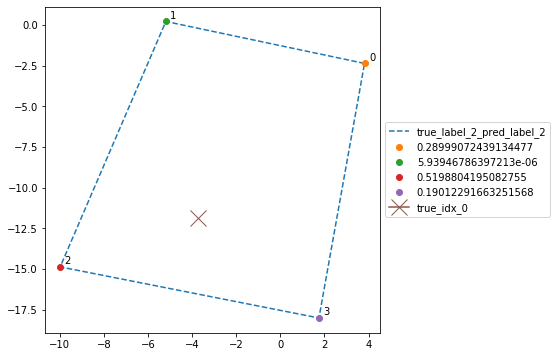

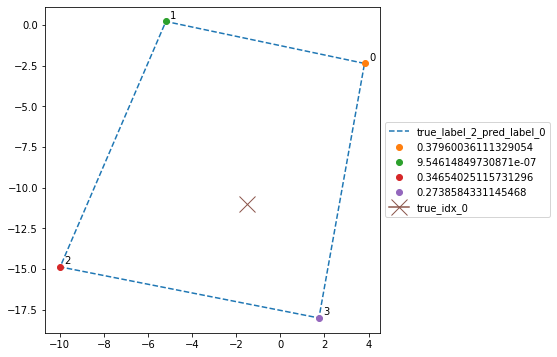

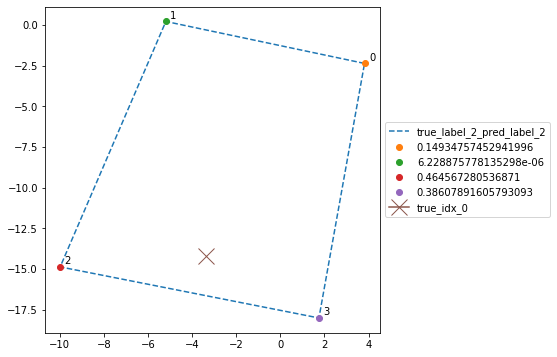

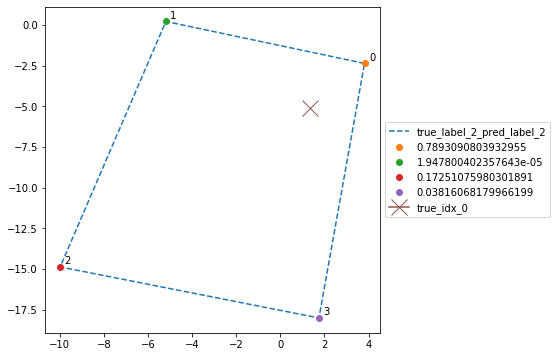

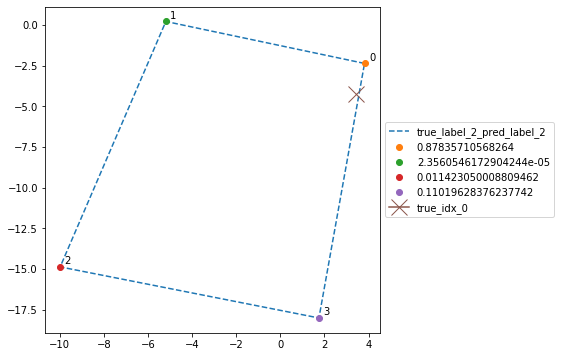

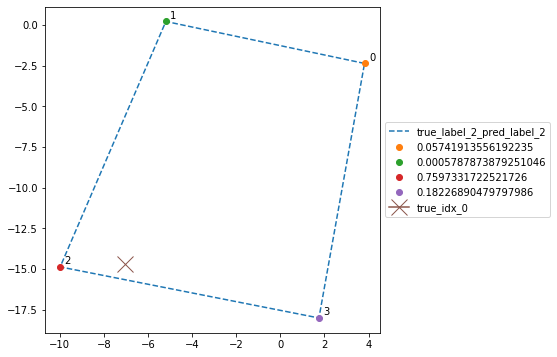

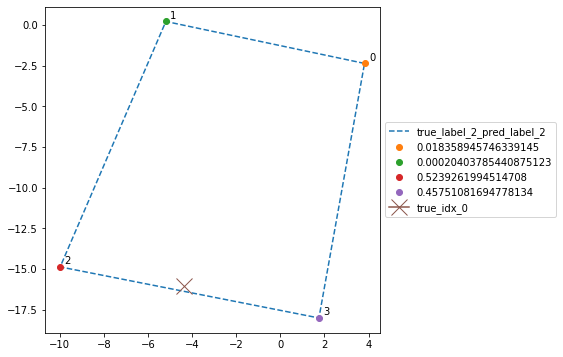

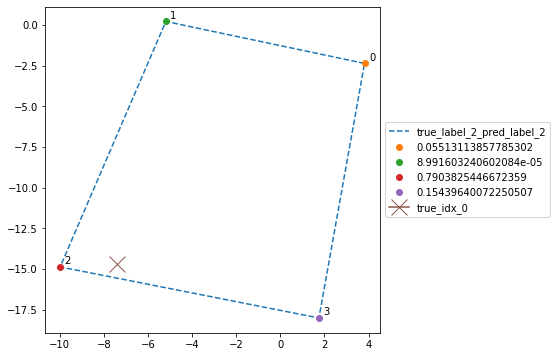

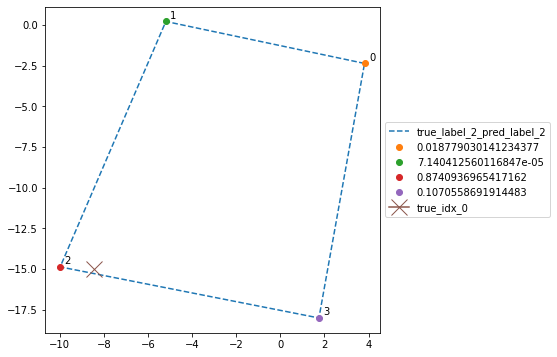

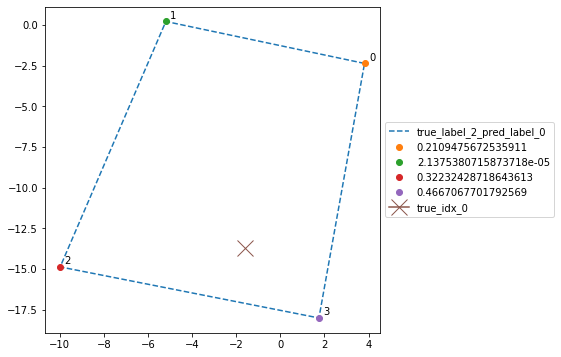

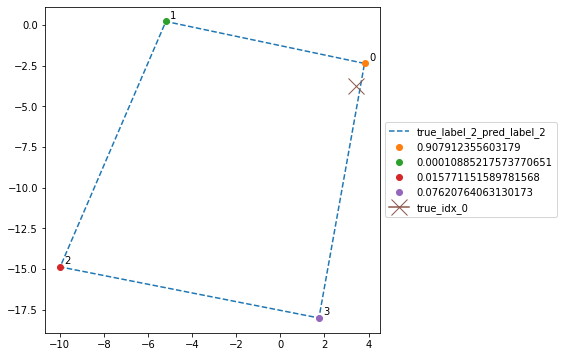

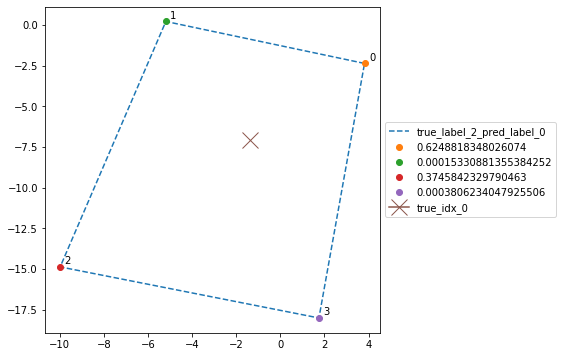

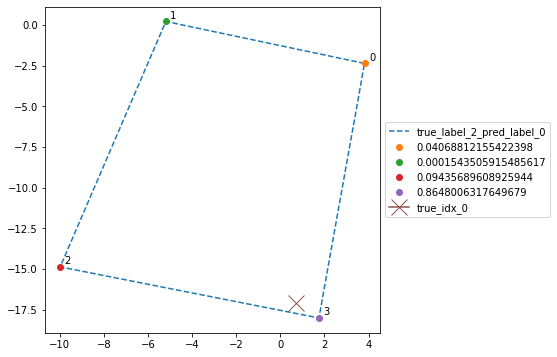

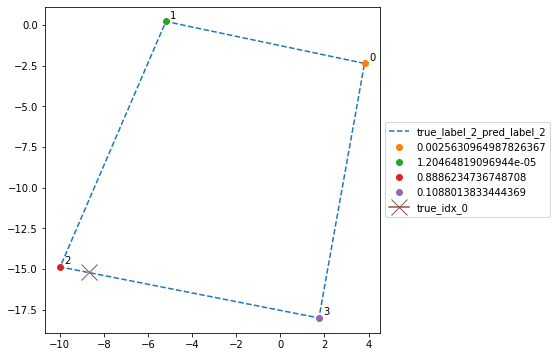

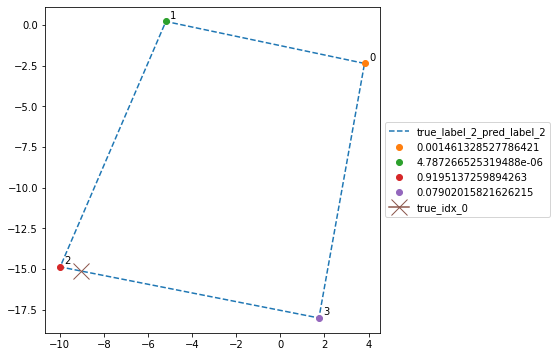

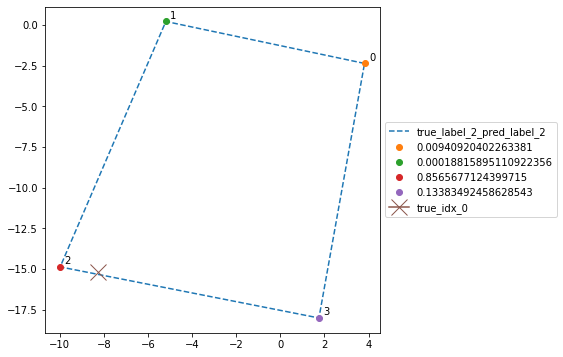

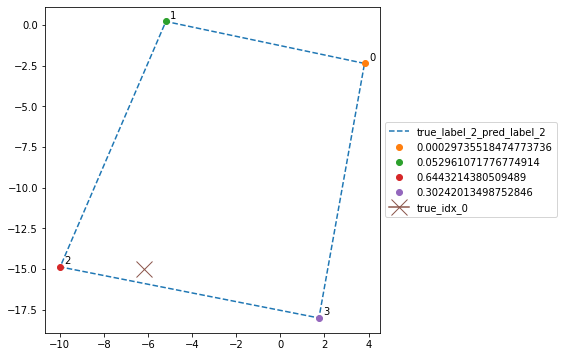

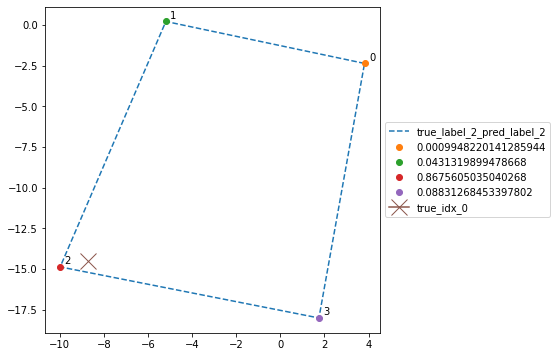

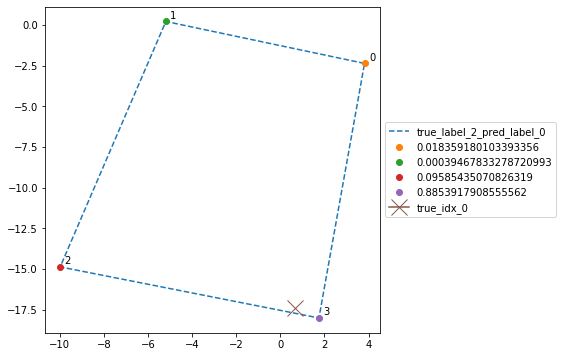

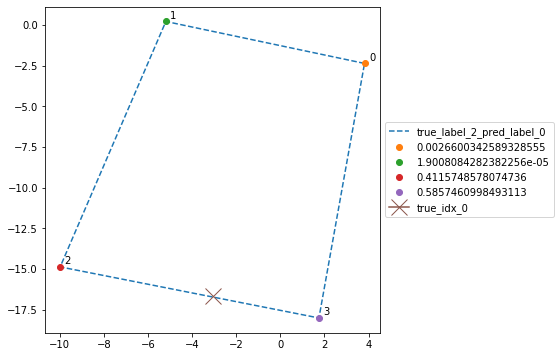

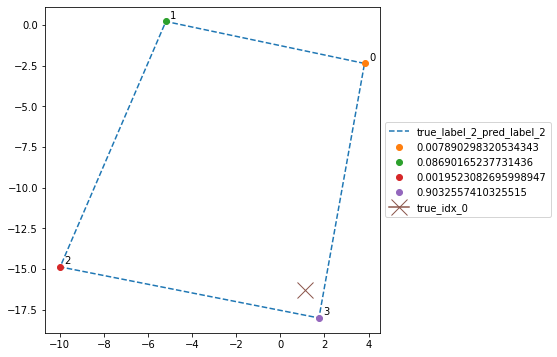

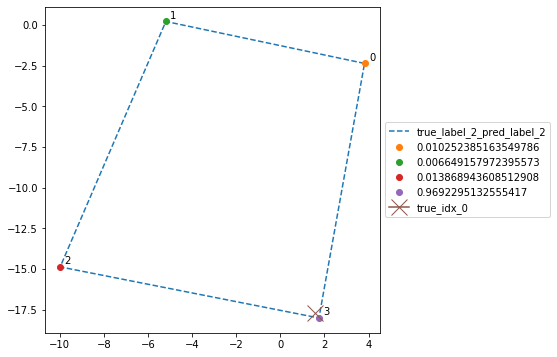

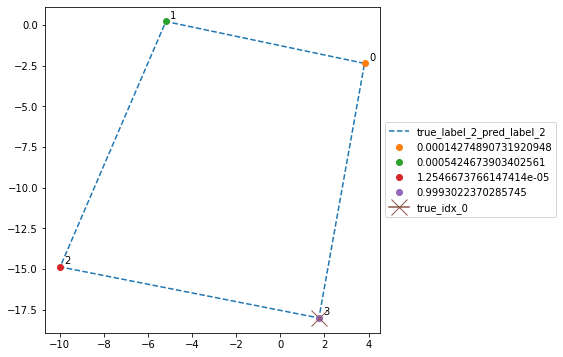

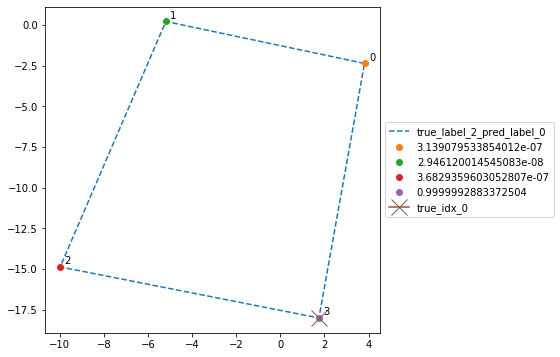

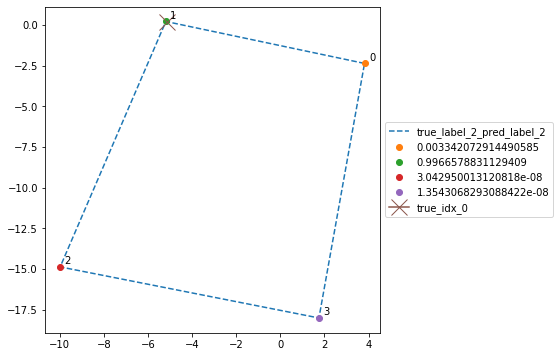

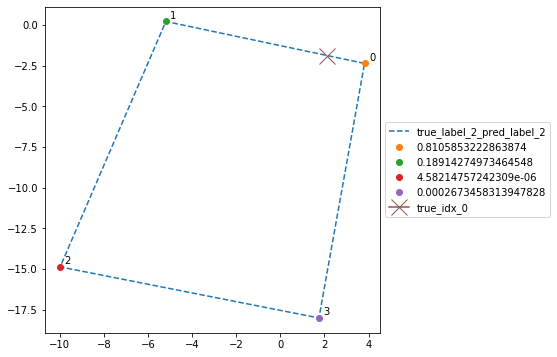

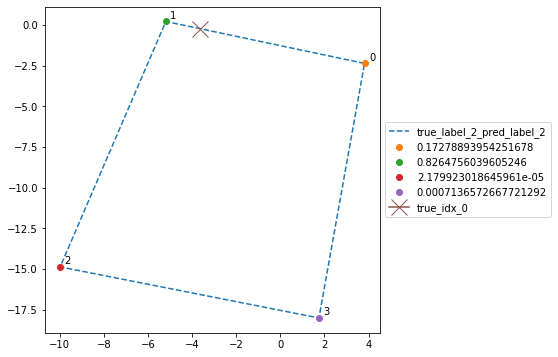

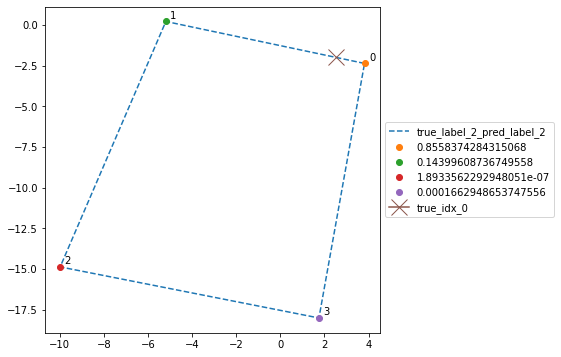

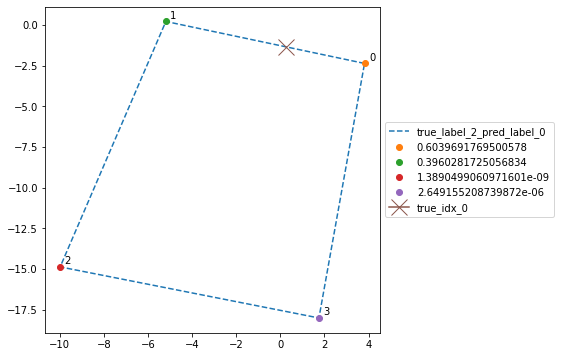

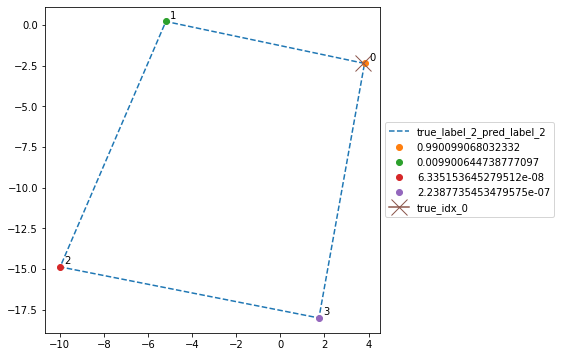

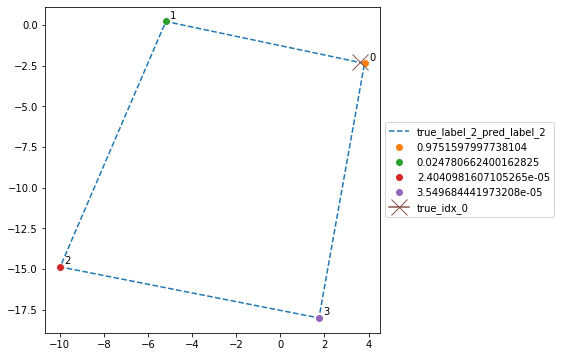

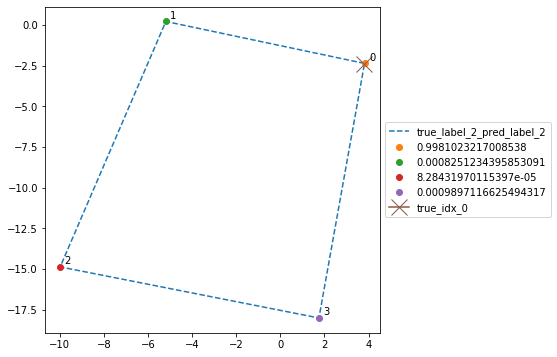

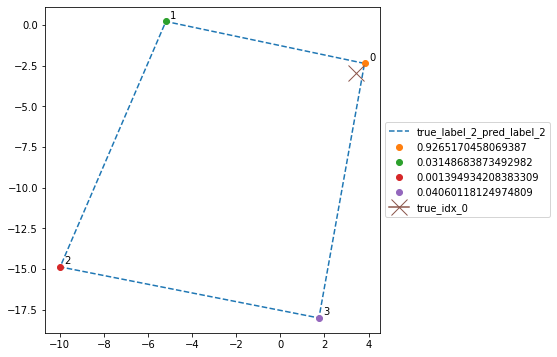

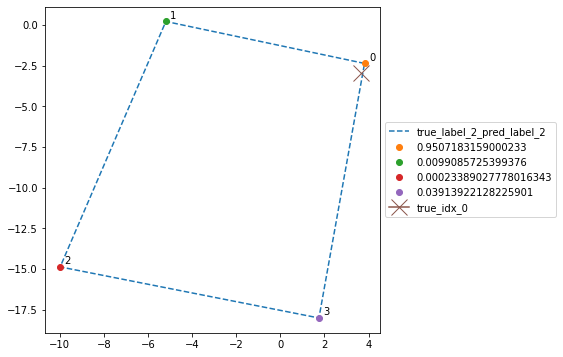

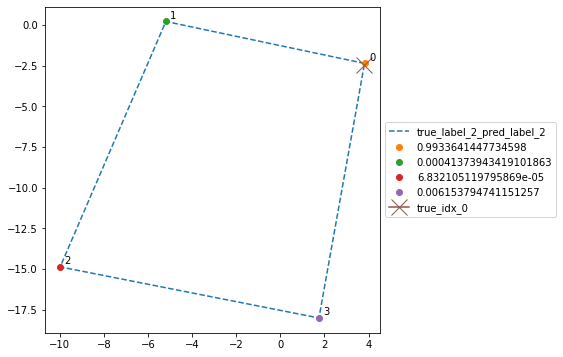

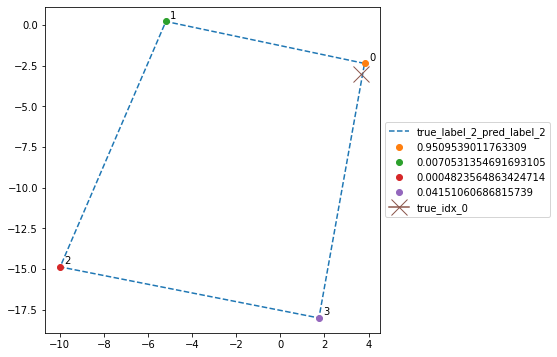

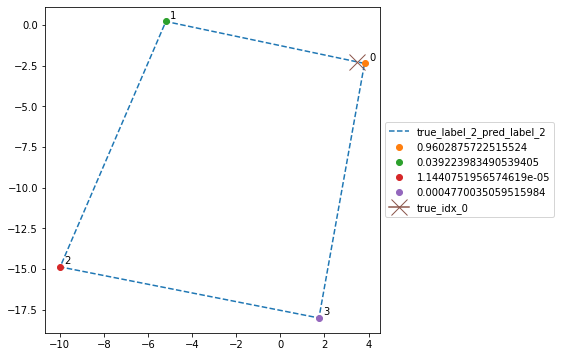

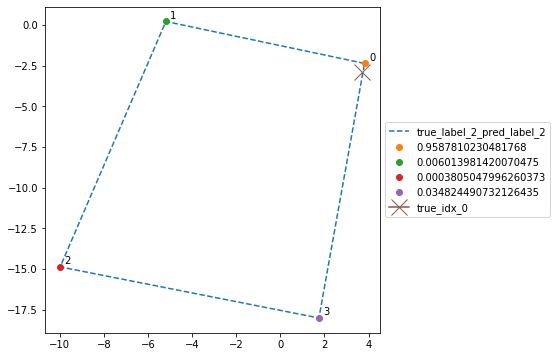

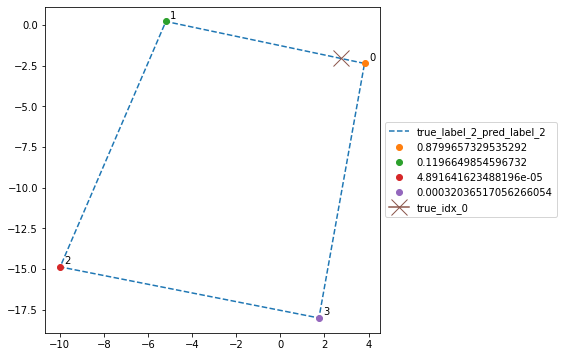

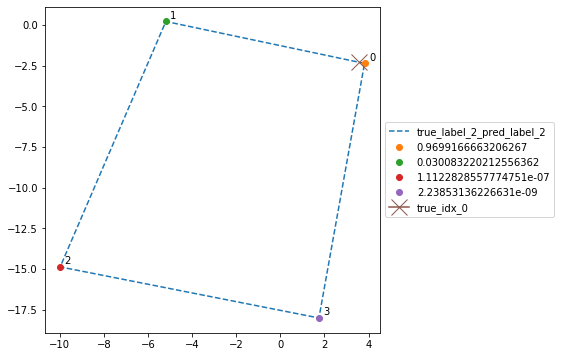

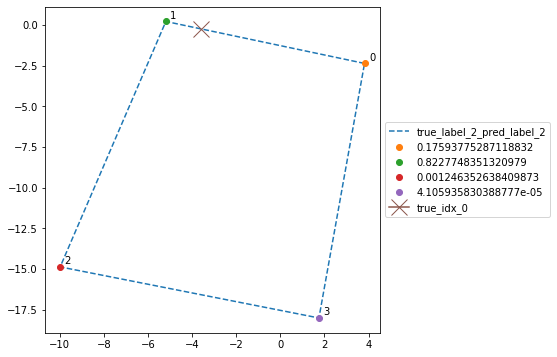

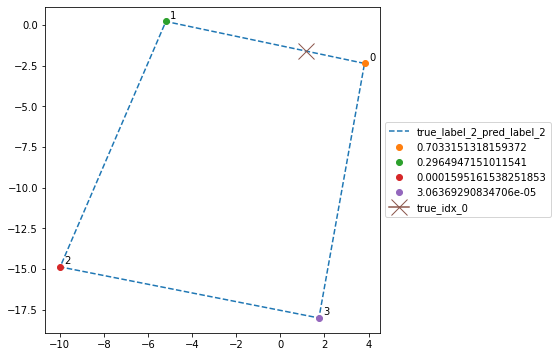

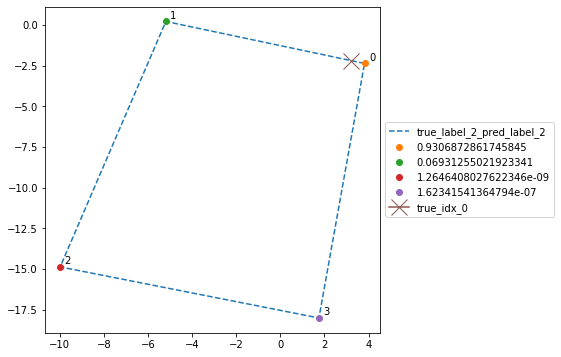

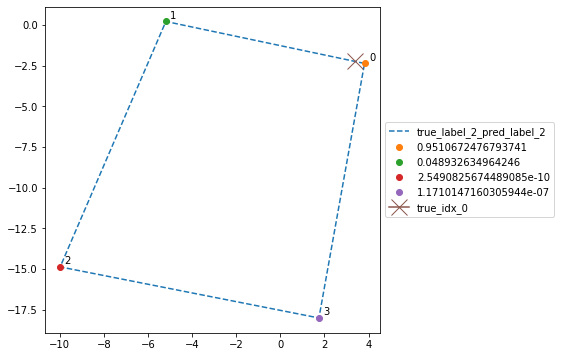

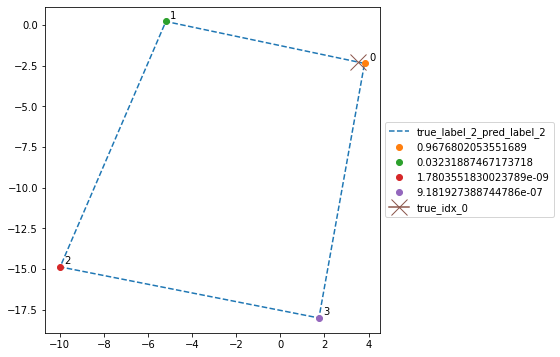

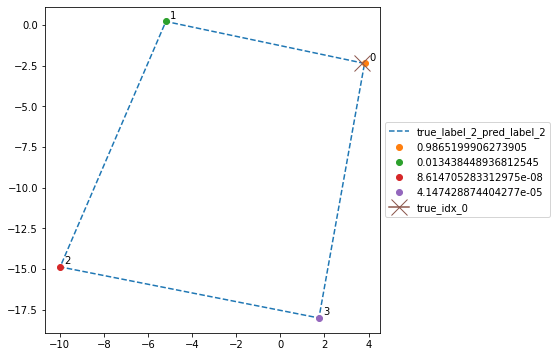

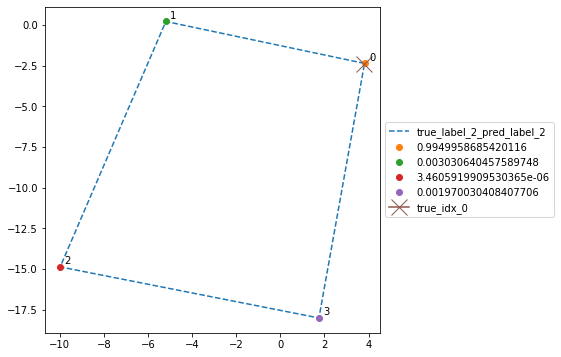

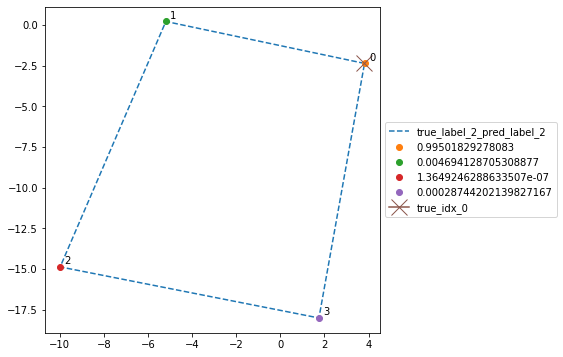

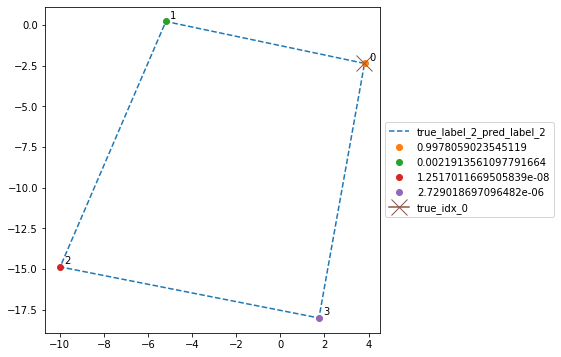

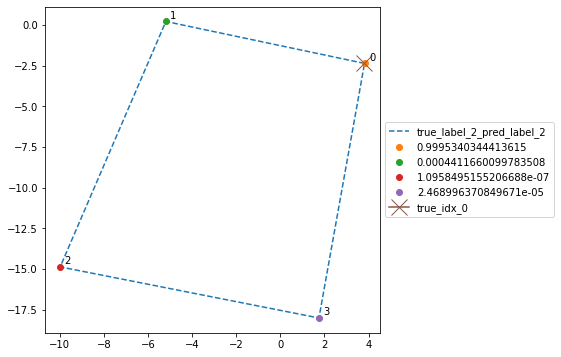

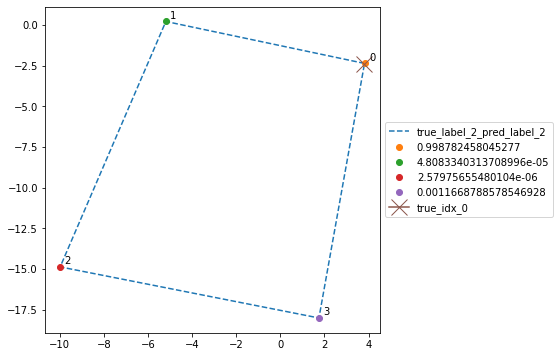

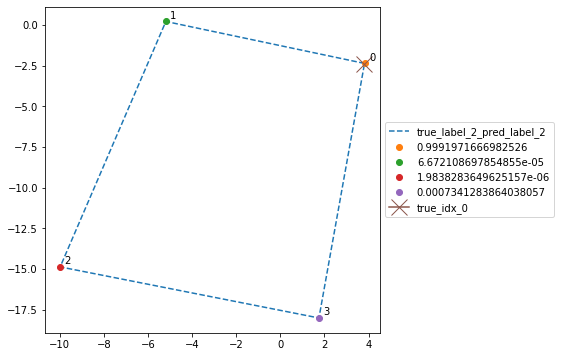

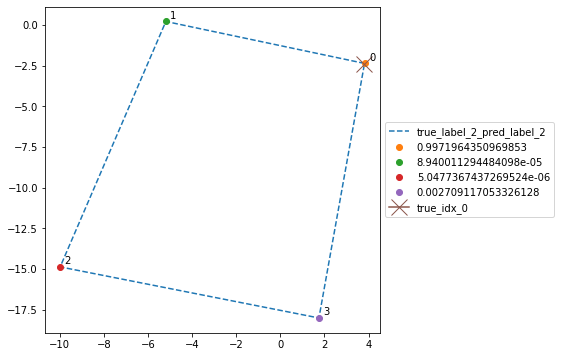

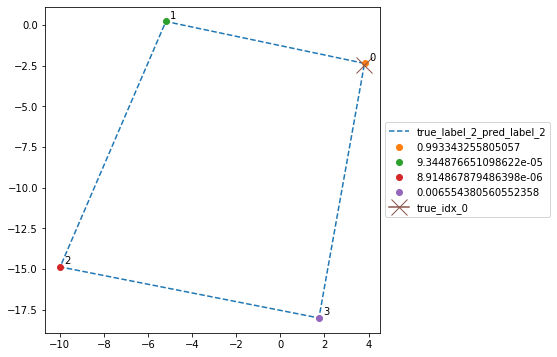

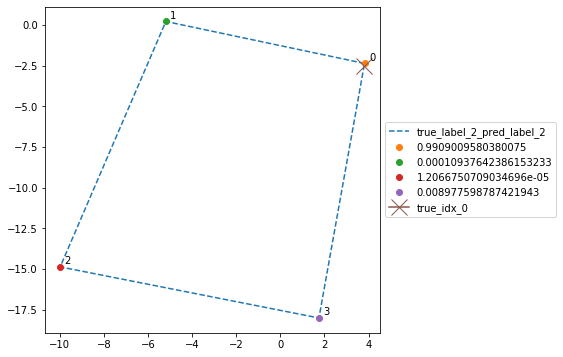

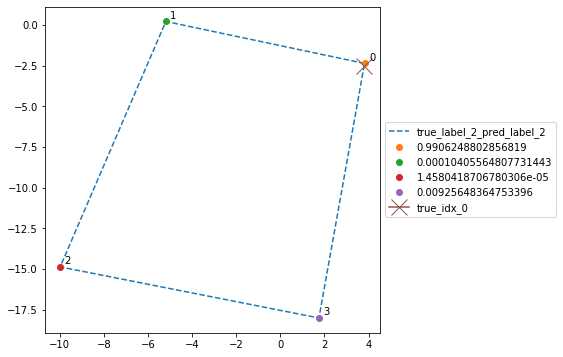

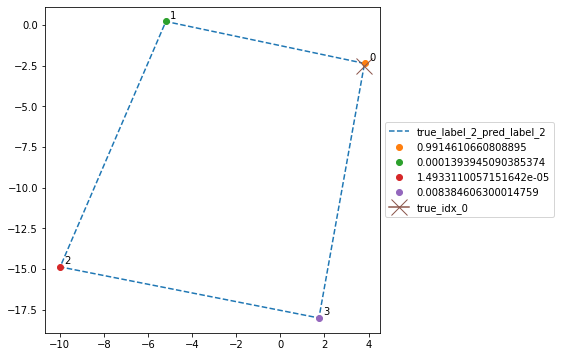

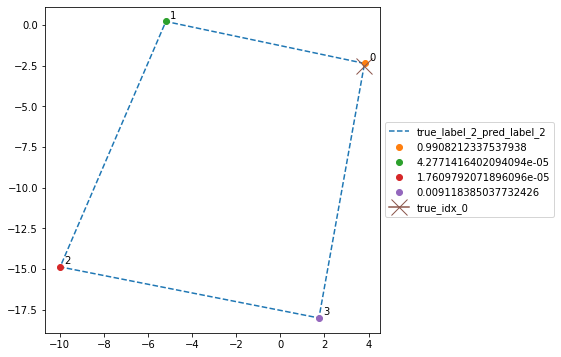

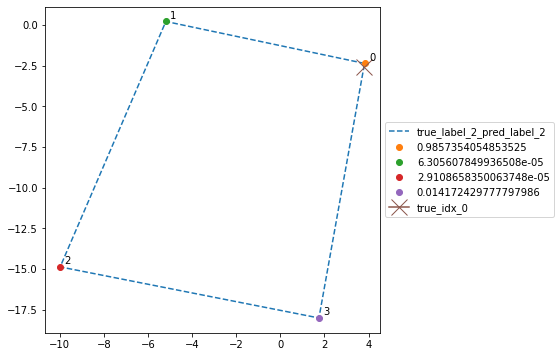

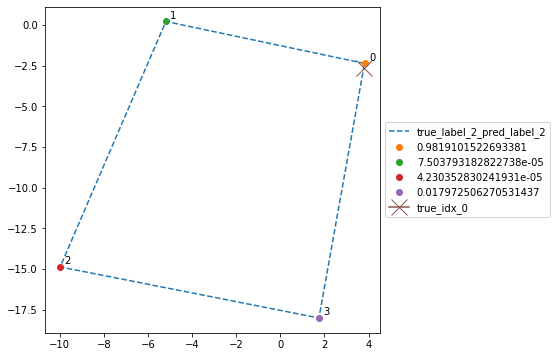

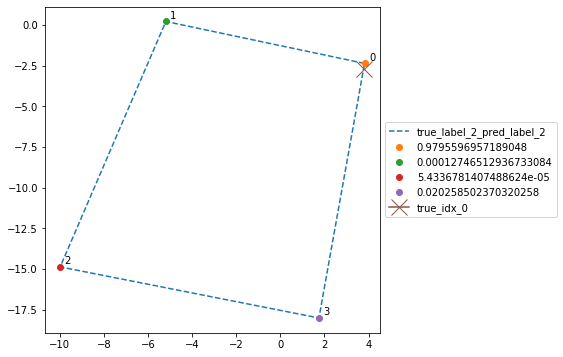

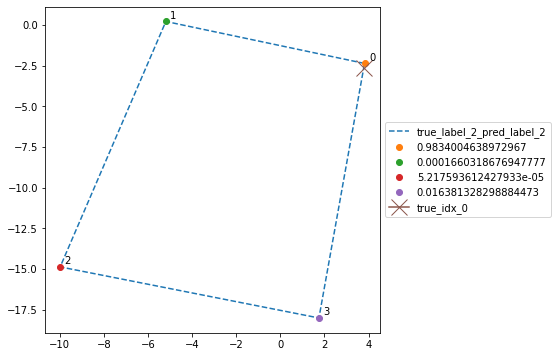

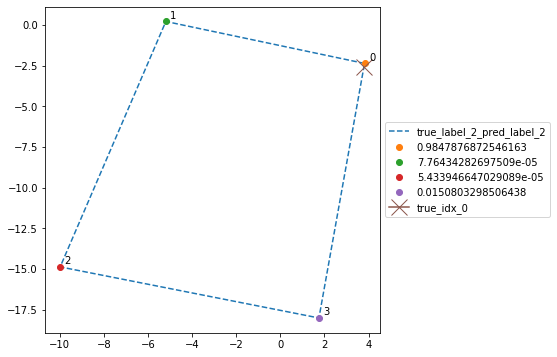

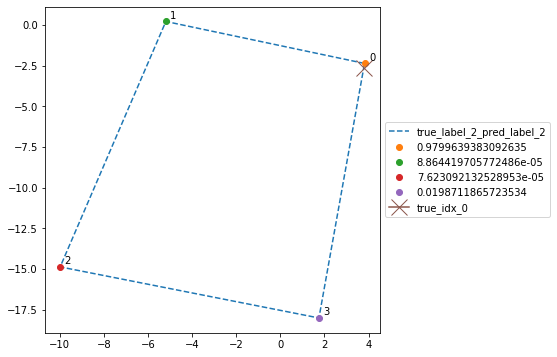

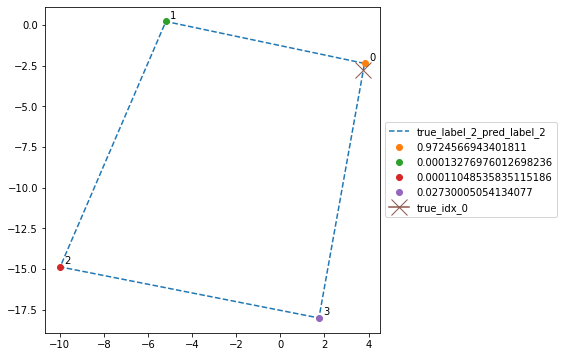

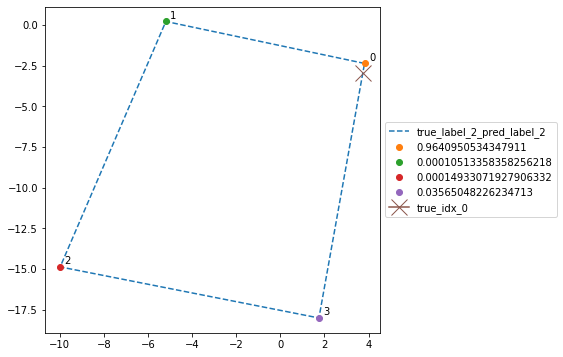

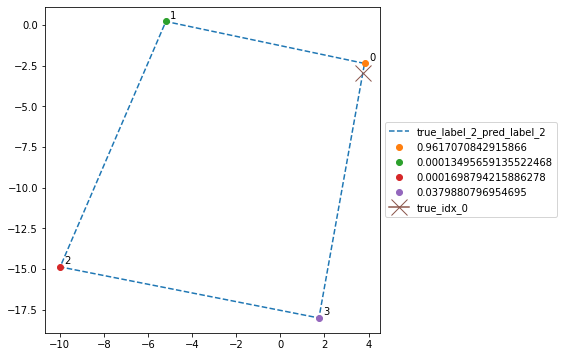

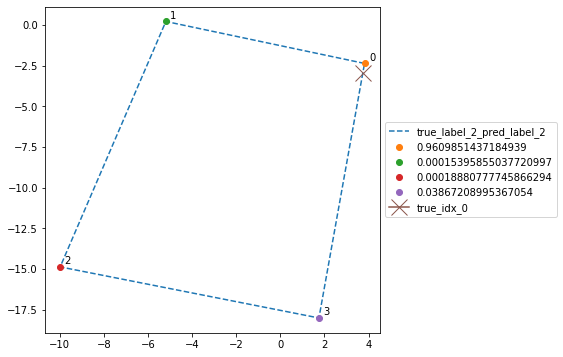

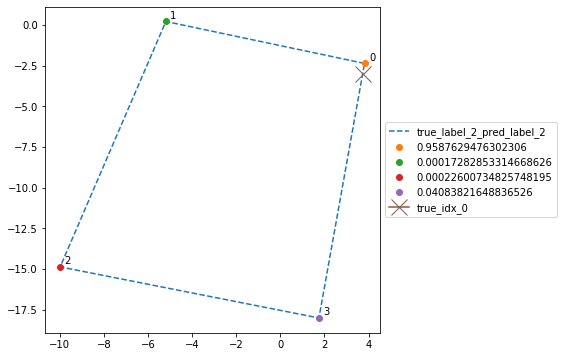

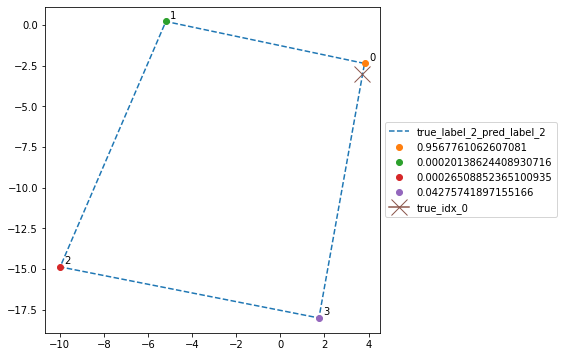

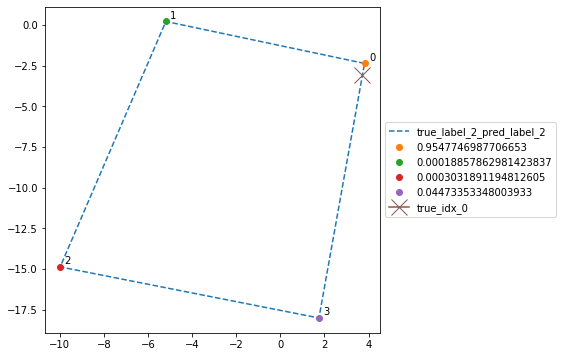

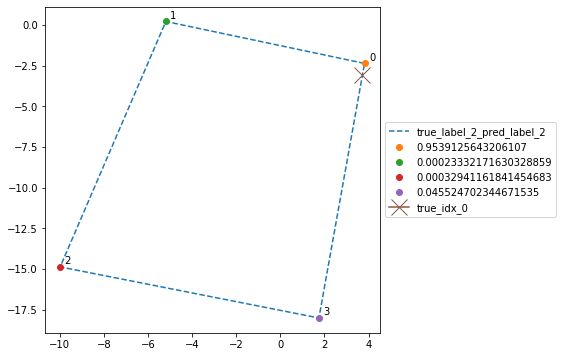

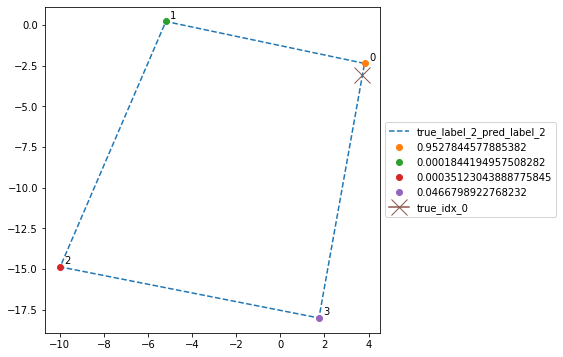

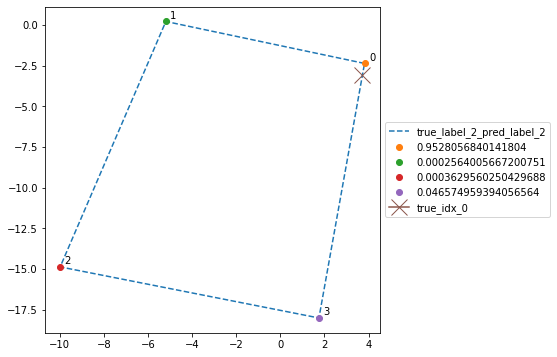

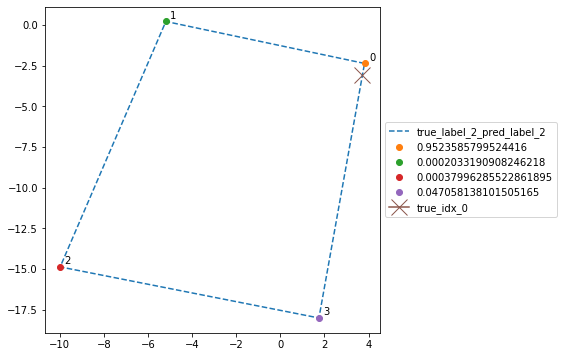

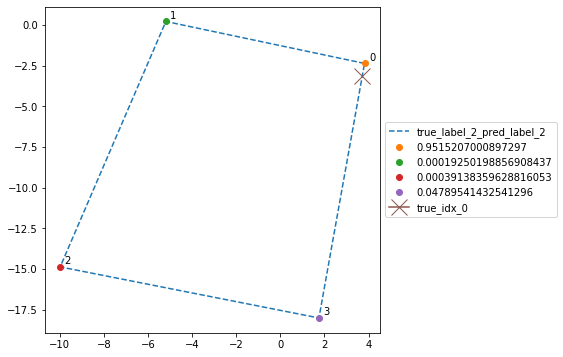

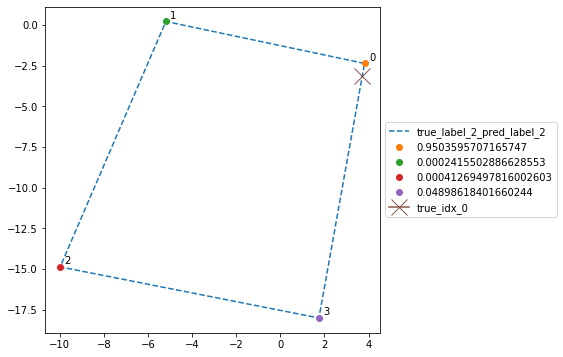

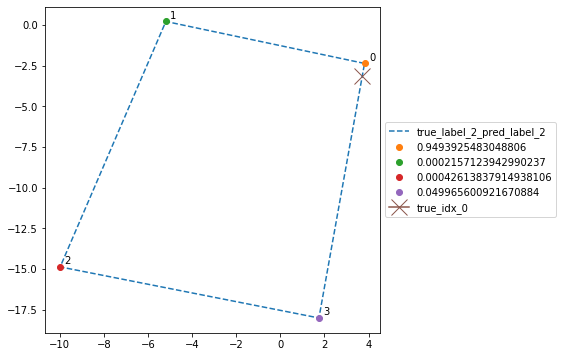

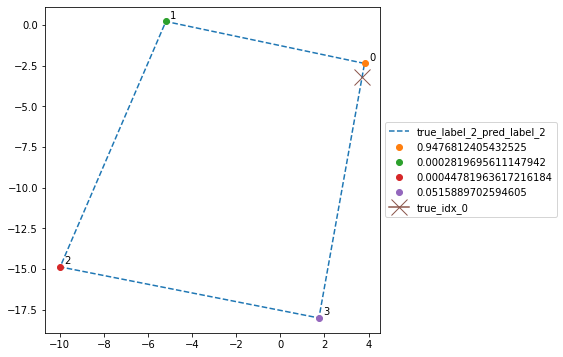

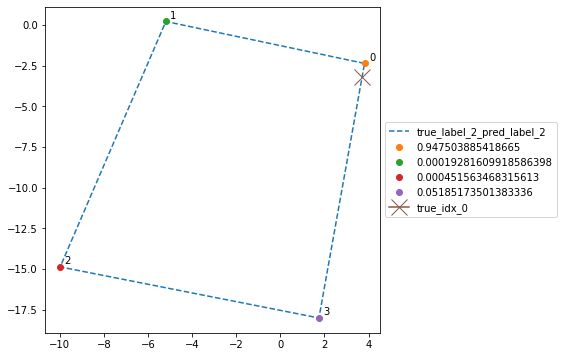

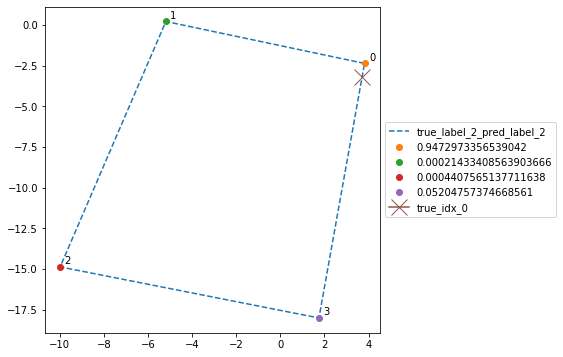

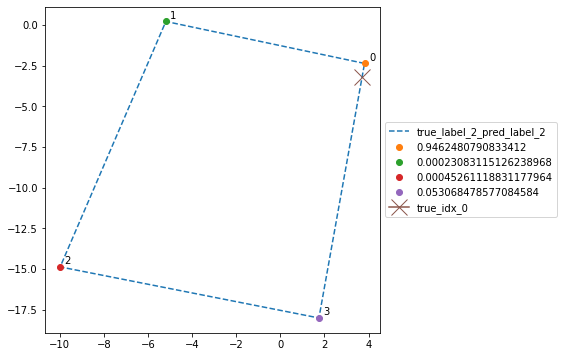

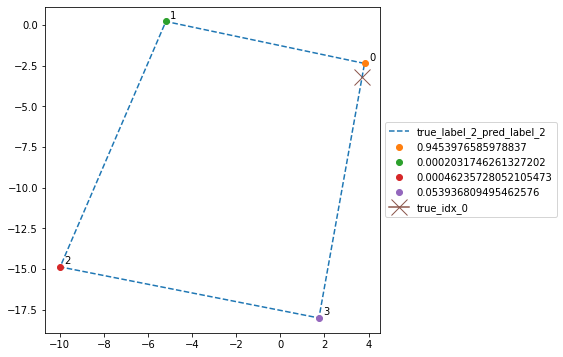

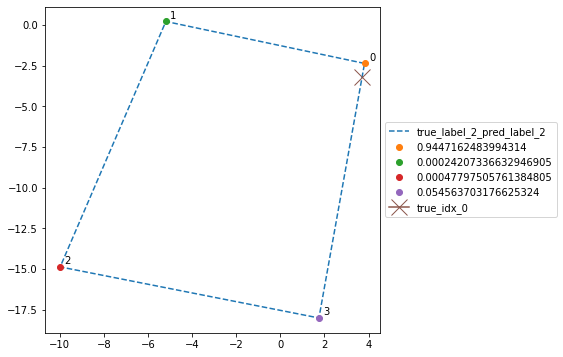

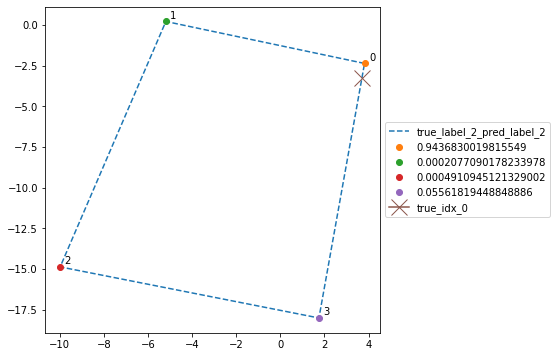

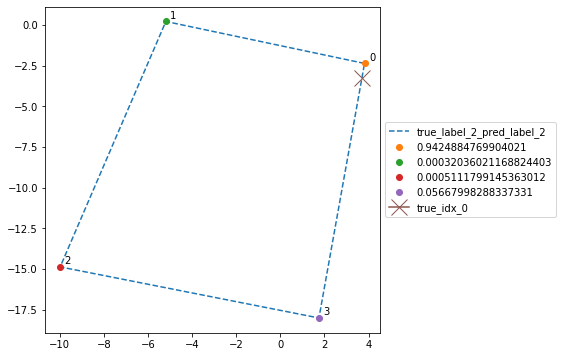

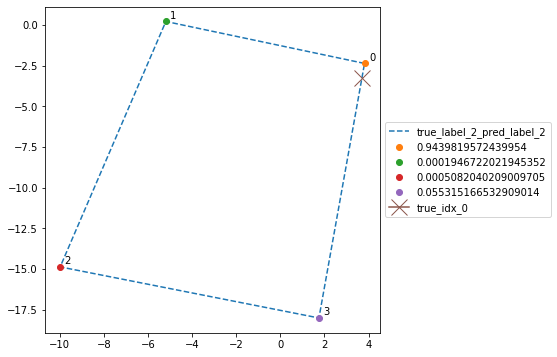

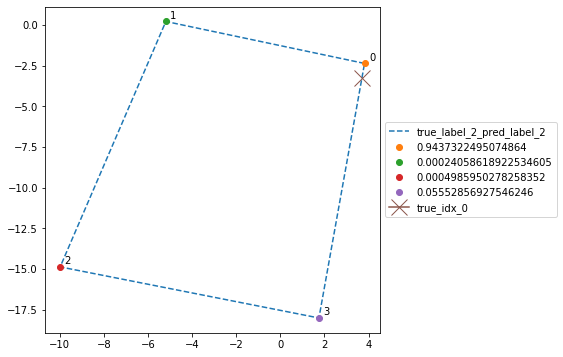

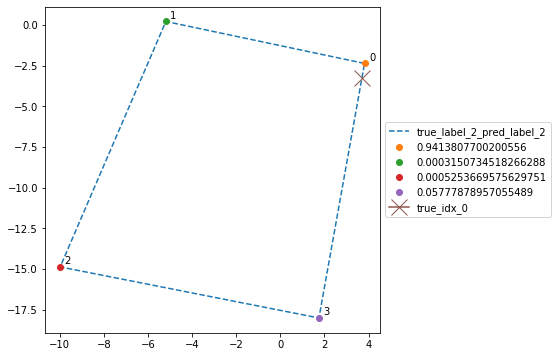

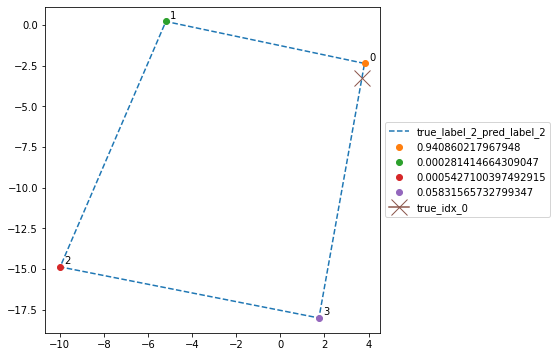

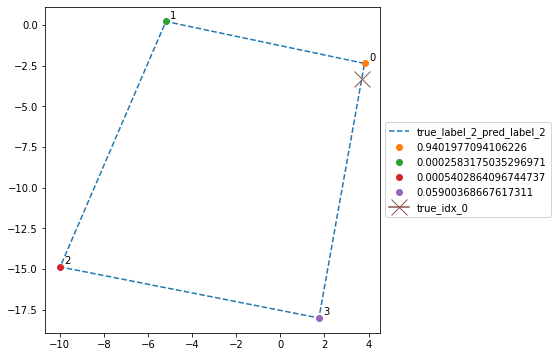

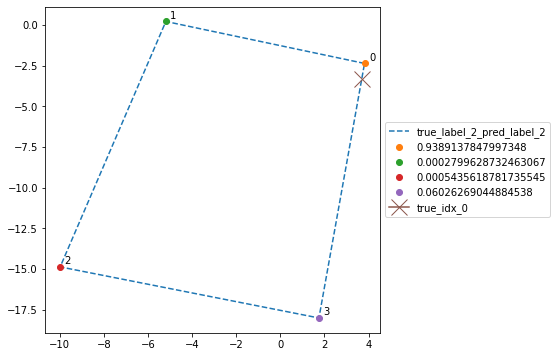

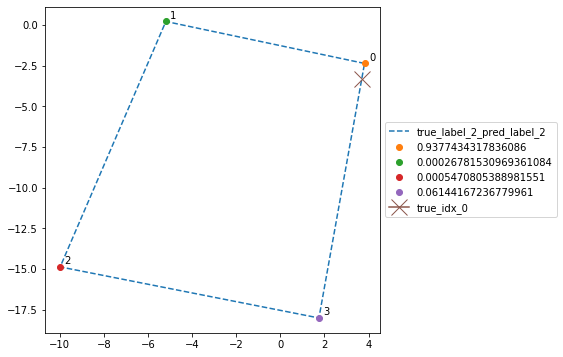

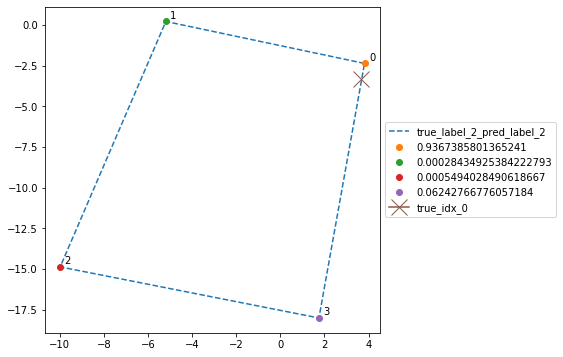

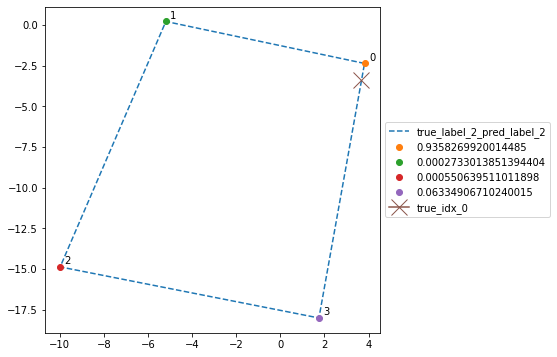

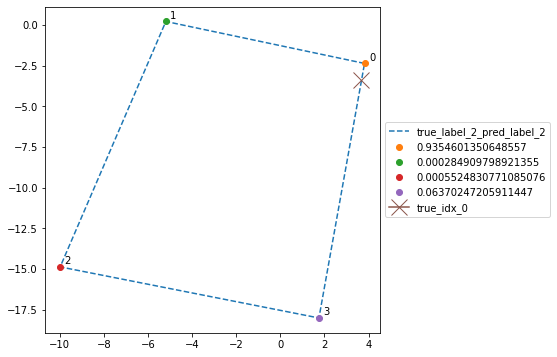

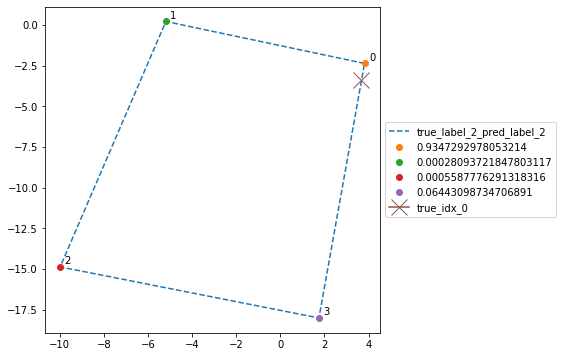

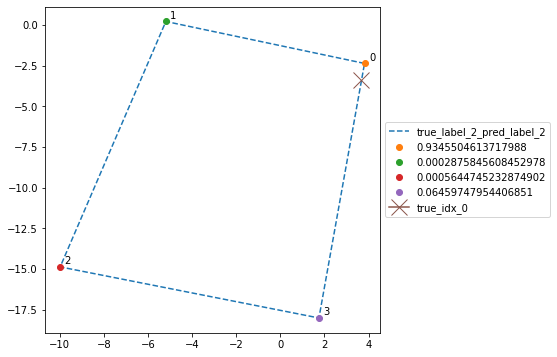

In [0]:

focus_true_pred_true =0
focus_false_pred_true =0
focus_true_pred_false =0
focus_false_pred_false =0

argmax_more_than_half = 0
argmax_less_than_half =0

col1=[]
col2=[]
col3=[]
col4=[]
col5=[]
col6=[]
col7=[]
col8=[]
col9=[]
col10=[]
col11=[]
col12=[]
col13=[]

criterion = nn.CrossEntropyLoss()
optimizer_where = optim.SGD(where.parameters(), lr=0.01, momentum=0.9)
optimizer_what = optim.SGD(what.parameters(), lr=0.01, momentum=0.9)

nos_epochs = 150

train_loss=[]
test_loss =[]
train_acc = []
test_acc = []
ig = np.random.randint(0,250)
for epoch in range(nos_epochs):  # loop over the dataset multiple times

    focus_true_pred_true =0
    focus_false_pred_true =0
    focus_true_pred_false =0
    focus_false_pred_false =0

    argmax_more_than_half = 0
    argmax_less_than_half =0

    running_loss = 0.0
    cnt=0
    c = 0
    iteration = desired_num // batch

    #training data set

    for i, data in  enumerate(train_loader):
        inputs , labels , fore_idx = data
        #inputs,labels,fore_idx = inputs.to(device),labels.to(device),fore_idx.to(device)
        # zero the parameter gradients
        
        optimizer_what.zero_grad()
        optimizer_where.zero_grad()
        
        
        avg_inp,alphas = where(inputs)
        
        outputs = what(avg_inp)
        
        _, predicted = torch.max(outputs.data, 1)
        
        
        # display plots 
        if(c==0): 
            disp_plot(inputs[ig,:],avg_inp[ig,:],ig,labels[ig].item(),predicted[ig].item(), alphas[ig,:], fore_idx[ig].item())
            c+=1
        
        loss = criterion(outputs, labels) 
        loss.backward() 
        
        optimizer_what.step()
        optimizer_where.step() 
        

        running_loss += loss.item()
        if cnt % 6 == 5:    # print every 6 mini-batches
            #print('[%d, %5d] loss: %.3f' %(epoch + 1, cnt + 1, running_loss / 6))
            running_loss = 0.0
        cnt=cnt+1
    
        if epoch % 5 == 4:
            for j in range (batch):
                focus = torch.argmax(alphas[j])

                if(alphas[j][focus] >= 0.5):
                    argmax_more_than_half +=1
                else:
                    argmax_less_than_half +=1

                if(focus == fore_idx[j] and predicted[j] == labels[j]):
                    focus_true_pred_true += 1

                elif(focus != fore_idx[j] and predicted[j] == labels[j]):
                    focus_false_pred_true +=1

                elif(focus == fore_idx[j] and predicted[j] != labels[j]):
                    focus_true_pred_false +=1

                elif(focus != fore_idx[j] and predicted[j] != labels[j]):
                    focus_false_pred_false +=1

    if epoch % 5 == 4:
        col1.append(epoch)
        col2.append(argmax_more_than_half)
        col3.append(argmax_less_than_half)
        col4.append(focus_true_pred_true)
        col5.append(focus_false_pred_true)
        col6.append(focus_true_pred_false)
        col7.append(focus_false_pred_false)

    #************************************************************************
        #testing data set  
        with torch.no_grad():
            focus_true_pred_true =0
            focus_false_pred_true =0
            focus_true_pred_false =0
            focus_false_pred_false =0

            argmax_more_than_half = 0
            argmax_less_than_half =0
            for data in test_loader:
                inputs, labels , fore_idx = data
                #inputs,labels,fore_idx = inputs.to(device),labels.to(device),fore_idx.to(device) 
#                 print(inputs.shtorch.save(where.state_dict(),"model_epoch"+str(epoch)+".pt")ape,labels.shape)
                avg_inp,alphas = where(inputs)
                outputs = what(avg_inp)
                _, predicted = torch.max(outputs.data, 1)

                for j in range (batch):
                    focus = torch.argmax(alphas[j])

                    if(alphas[j][focus] >= 0.5):
                        argmax_more_than_half +=1
                    else:
                        argmax_less_than_half +=1

                    if(focus == fore_idx[j] and predicted[j] == labels[j]):
                        focus_true_pred_true += 1

                    elif(focus != fore_idx[j] and predicted[j] == labels[j]):
                        focus_false_pred_true +=1

                    elif(focus == fore_idx[j] and predicted[j] != labels[j]):
                        focus_true_pred_false +=1

                    elif(focus != fore_idx[j] and predicted[j] != labels[j]):
                        focus_false_pred_false +=1

        col8.append(argmax_more_than_half)
        col9.append(argmax_less_than_half)
        col10.append(focus_true_pred_true)
        col11.append(focus_false_pred_true)
        col12.append(focus_true_pred_false)
        col13.append(focus_false_pred_false)
        torch.save(where.state_dict(),"weight_gaussian_mixture/where_model_epoch"+str(epoch)+".pt")
        torch.save(what.state_dict(),"weight_gaussian_mixture/what_model_epoch"+str(epoch)+".pt")
    
print('Finished Training')
torch.save(where.state_dict(),"weight_gaussian_mixture/where_model_epoch"+str(nos_epochs)+".pt")
torch.save(what.state_dict(),"weight_gaussian_mixture/what_model_epoch"+str(epoch)+".pt")


In [0]:
columns = ["epochs", "argmax > 0.5" ,"argmax < 0.5", "focus_true_pred_true", "focus_false_pred_true", "focus_true_pred_false", "focus_false_pred_false" ]
df_train = pd.DataFrame()
df_test = pd.DataFrame()
df_train[columns[0]] = col1
df_train[columns[1]] = col2
df_train[columns[2]] = col3
df_train[columns[3]] = col4
df_train[columns[4]] = col5
df_train[columns[5]] = col6
df_train[columns[6]] = col7
df_test[columns[0]] = col1
df_test[columns[1]] = col8
df_test[columns[2]] = col9
df_test[columns[3]] = col10
df_test[columns[4]] = col11
df_test[columns[5]] = col12
df_test[columns[6]] = col13

In [0]:
df_train

epochs  argmax > 0.5  argmax < 0.5  focus_true_pred_true  \
0        4           539          2461                   448   
1        9          2319           681                  1333   
2       14          2598           402                  1405   
3       19          2770           230                  1628   
4       24          2713           287                  1709   
5       29          2702           298                  1899   
6       34          2759           241                  1955   
7       39          2812           188                  2019   
8       44          2940            60                  1895   
9       49          2929            71                  2027   
10      54          2948            52                  2075   
11      59          2965            35                  2079   
12      64          2968            32                  1948   
13      69          2977            23                  2091   
14      74          2973            27                  2064   
15      79          2985            15                  2508   
16      84          2968            32                  2825   
17      89          2980            20                  2645   
18      94          2997             3                  2556   
19      99          2988            12                  2661   
20     104          2996             4                  2948   
21     109          2998             2                  2970   
22     114          3000             0                  2971   
23     119          2998             2                  2973   
24     124          2999             1                  2972   
25     129          2997             3                  2973   
26     134          2997             3                  2973   
27     139          2997             3                  2973   
28     144          2997             3                  2973   
29     149          2997             3                  2973   

    focus_false_pred_true  focus_true_pred_false  focus_false_pred_false  
0                    1067                    568                     917  
1                     738                    261                     668  
2                     891                    177                     527  
3                     788                     71                     513  
4                     814                     27                     450  
5                     709                     13                     379  
6                     747                     25                     273  
7                     730                     32                     219  
8                     688                     95                     322  
9                     802                     10                     161  
10                    804                     17                     104  
11                    839                     14                      68  
12                    863                     33                     156  
13                    825                      9                      75  
14                    700                     31                     205  
15                    252                     26                     214  
16                    104                     20                      51  
17                    218                     15                     122  
18                    236                      6                     202  
19                    202                     21                     116  
20                     35                      0                      17  
21                     16                      0                      14  
22                     19                      0                      10  
23                     18                      0                       9  
24                     19                      0                       9  
25                     18                      0                     

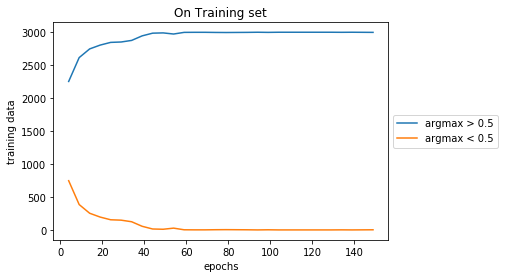

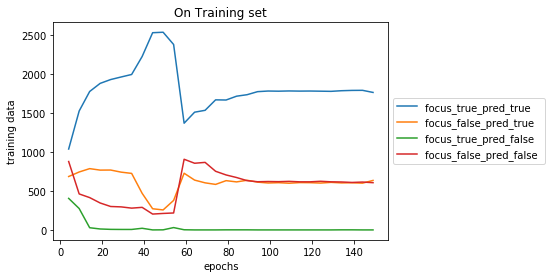

In [0]:
plt.plot(col1,col2, label='argmax > 0.5')
plt.plot(col1,col3, label='argmax < 0.5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.title("On Training set")
plt.show()

plt.plot(col1,col4, label ="focus_true_pred_true ")
plt.plot(col1,col5, label ="focus_false_pred_true ")
plt.plot(col1,col6, label ="focus_true_pred_false ")
plt.plot(col1,col7, label ="focus_false_pred_false ")
plt.title("On Training set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("training data")
plt.show()

In [0]:
df_test

epochs  argmax > 0.5  argmax < 0.5  focus_true_pred_true  \
0        4           760           240                   327   
1        9           860           140                   523   
2       14           890           110                   575   
3       19           929            71                   606   
4       24           950            50                   626   
5       29           947            53                   633   
6       34           949            51                   641   
7       39           981            19                   736   
8       44           994             6                   823   
9       49           992             8                   793   
10      54           991             9                   592   
11      59           998             2                   448   
12      64           998             2                   487   
13      69           998             2                   518   
14      74           998             2                   539   
15      79           998             2                   543   
16      84           997             3                   551   
17      89           996             4                   567   
18      94           997             3                   578   
19      99           997             3                   581   
20     104           997             3                   580   
21     109           997             3                   580   
22     114           997             3                   580   
23     119           997             3                   580   
24     124           997             3                   580   
25     129           997             3                   579   
26     134           997             3                   580   
27     139           999             1                   585   
28     144           999             1                   586   
29     149           997             3                   575   

    focus_false_pred_true  focus_true_pred_false  focus_false_pred_false  
0                     274                    130                     269  
1                     273                     41                     163  
2                     297                      6                     122  
3                     282                      1                     111  
4                     276                      1                      97  
5                     281                      0                      86  
6                     266                      0                      93  
7                     173                      1                      90  
8                      94                      0                      83  
9                     130                      0                      77  
10                    171                      8                     229  
11                    258                      1                     293  
12                    237                      0                     276  
13                    199                      0                     283  
14                    218                      0                     243  
15                    213                      0                     244  
16                    224                      0                     225  
17                    230                      0                     203  
18                    222                      0                     200  
19                    219                      0                     200  
20                    217                      0                     203  
21                    215                      0                     205  
22                    215                      0                     205  
23                    217                      0                     203  
24                    219                      0                     201  
25                    217                      0                     

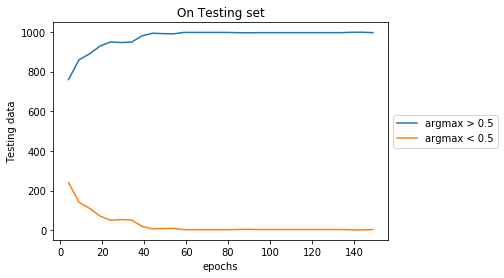

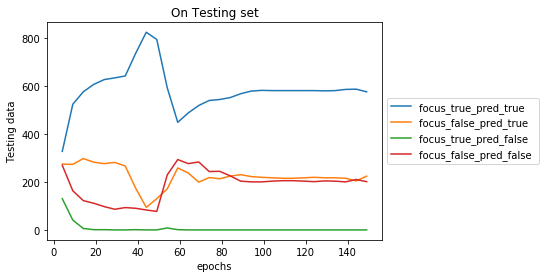

In [0]:
plt.plot(col1,col8, label='argmax > 0.5')
plt.plot(col1,col9, label='argmax < 0.5')

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("Testing data")
plt.title("On Testing set")
plt.show()

plt.plot(col1,col10, label ="focus_true_pred_true ")
plt.plot(col1,col11, label ="focus_false_pred_true ")
plt.plot(col1,col12, label ="focus_true_pred_false ")
plt.plot(col1,col13, label ="focus_false_pred_false ")
plt.title("On Testing set")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.xlabel("epochs")
plt.ylabel("Testing data")
plt.show()